In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
teleco_churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
teleco_churn.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]



*  **CustomerID:** Unique identifier for each customer
*  **Gender:** Customer's gender
*   **SeniorCitizen:** defines whether customer is an older adult and especially one who is age 65 or older
*   **Partner:** defines wether the customer has a partner
*   **Dependents:**Whether the customer has dependents (children or others)
*   **Tenure:** Number of months the customer has been with the company.
*   **PhoneService:**Whether the customer has a phone service
*   **MultipleLines:**Whether the customer has multiple phone lines: No, Yes, or No phone service.
*   **InternetService:**Type of internet service: DSL, Fiber optic, or No.
*   **Online Security:**Whether the customer has online security add-on: Yes, No, or No internet service
*   **OnlineBackup:**Whether the customer has online backup add-on: Yes, No, or No internet service
*   **DeviceProtection:**Whether the customer has device protection: Yes, No, or No internet service.
*   **TechSupport:**Whether the customer has tech support add-on: Yes, No, or No internet service.
*   **StreamingTV:**Whether the customer has streaming TV service: Yes, No, or No internet service.
*   **StreamingMovies:**Whether the customer has streaming movie service: Yes, No, or No internet service.
*   **Contract:**Type of contract: Month-to-month, One year, or Two year.
*   **PaperlessBilling:**Whether the customer is on paperless billing: Yes or No.
*   **PaymentMethod:**Payment method: Electronic check, Mailed check, Bank transfer (auto), or Credit card (auto).
*   **MonthlyCharges:**The amount charged to the customer monthly.
*   **TotalCharges:**The total amount charged to the customer over their tenure.
*   **Churn:**Whether the customer left the company during the observation period











# **1. Data Cleaning & Preparation**


# Column Type Fixes

In [3]:
teleco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Total charges has mixed type integers and characters thats why it is stored as object

In [4]:
#dealing with datatypes
teleco_churn['TotalCharges'] = pd.to_numeric(teleco_churn['TotalCharges'] , errors='coerce')

teleco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Simplifying Redundant Categories

In [5]:
for col in teleco_churn.select_dtypes(include='object').columns:
    print(f"{col}:", teleco_churn[col].unique())


customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [6]:
teleco_churn['SeniorCitizen'] = teleco_churn['SeniorCitizen'].astype('object')

In [7]:
internet_related = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'StreamingTV', 'StreamingMovies','TechSupport']

for col in internet_related:
    teleco_churn[col] = teleco_churn[col].replace('No internet service', 'No')


In [8]:
teleco_churn['MultipleLines'] = teleco_churn['MultipleLines'].replace('No phone service', 'No')



# Handling Inconsistencies

In [9]:
def clean_yes_no_cols(teleco_churn):
    yes_no_cols = [col for col in teleco_churn.columns
                   if teleco_churn[col].nunique() <= 3 and teleco_churn[col].dtype == 'object']

    for col in yes_no_cols:
        # Convert to string before using string methods
        teleco_churn[col] = teleco_churn[col].astype(str).str.strip().str.lower().replace({'yes': 'Yes', 'no': 'No'})

    return teleco_churn


In [10]:
cat_cols = ['MultipleLines','SeniorCitizen','gender', 'Partner', 'Dependents','PhoneService','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

for col in cat_cols:
    teleco_churn[col] = teleco_churn[col].astype('category')


In [11]:
for col in teleco_churn.select_dtypes(include='category').columns:
    print(f"{col}:", teleco_churn[col].unique())


gender: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
SeniorCitizen: [0, 1]
Categories (2, int64): [0, 1]
Partner: ['Yes', 'No']
Categories (2, object): ['No', 'Yes']
Dependents: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
PhoneService: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
MultipleLines: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
InternetService: ['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No']
OnlineSecurity: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
OnlineBackup: ['Yes', 'No']
Categories (2, object): ['No', 'Yes']
DeviceProtection: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
TechSupport: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
StreamingTV: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
StreamingMovies: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
Contract: ['Month-to-month', 'One year', 'Two year']
Categories (3, object): ['Month-to-month', 'One year', 'Two year'

# Missing Values

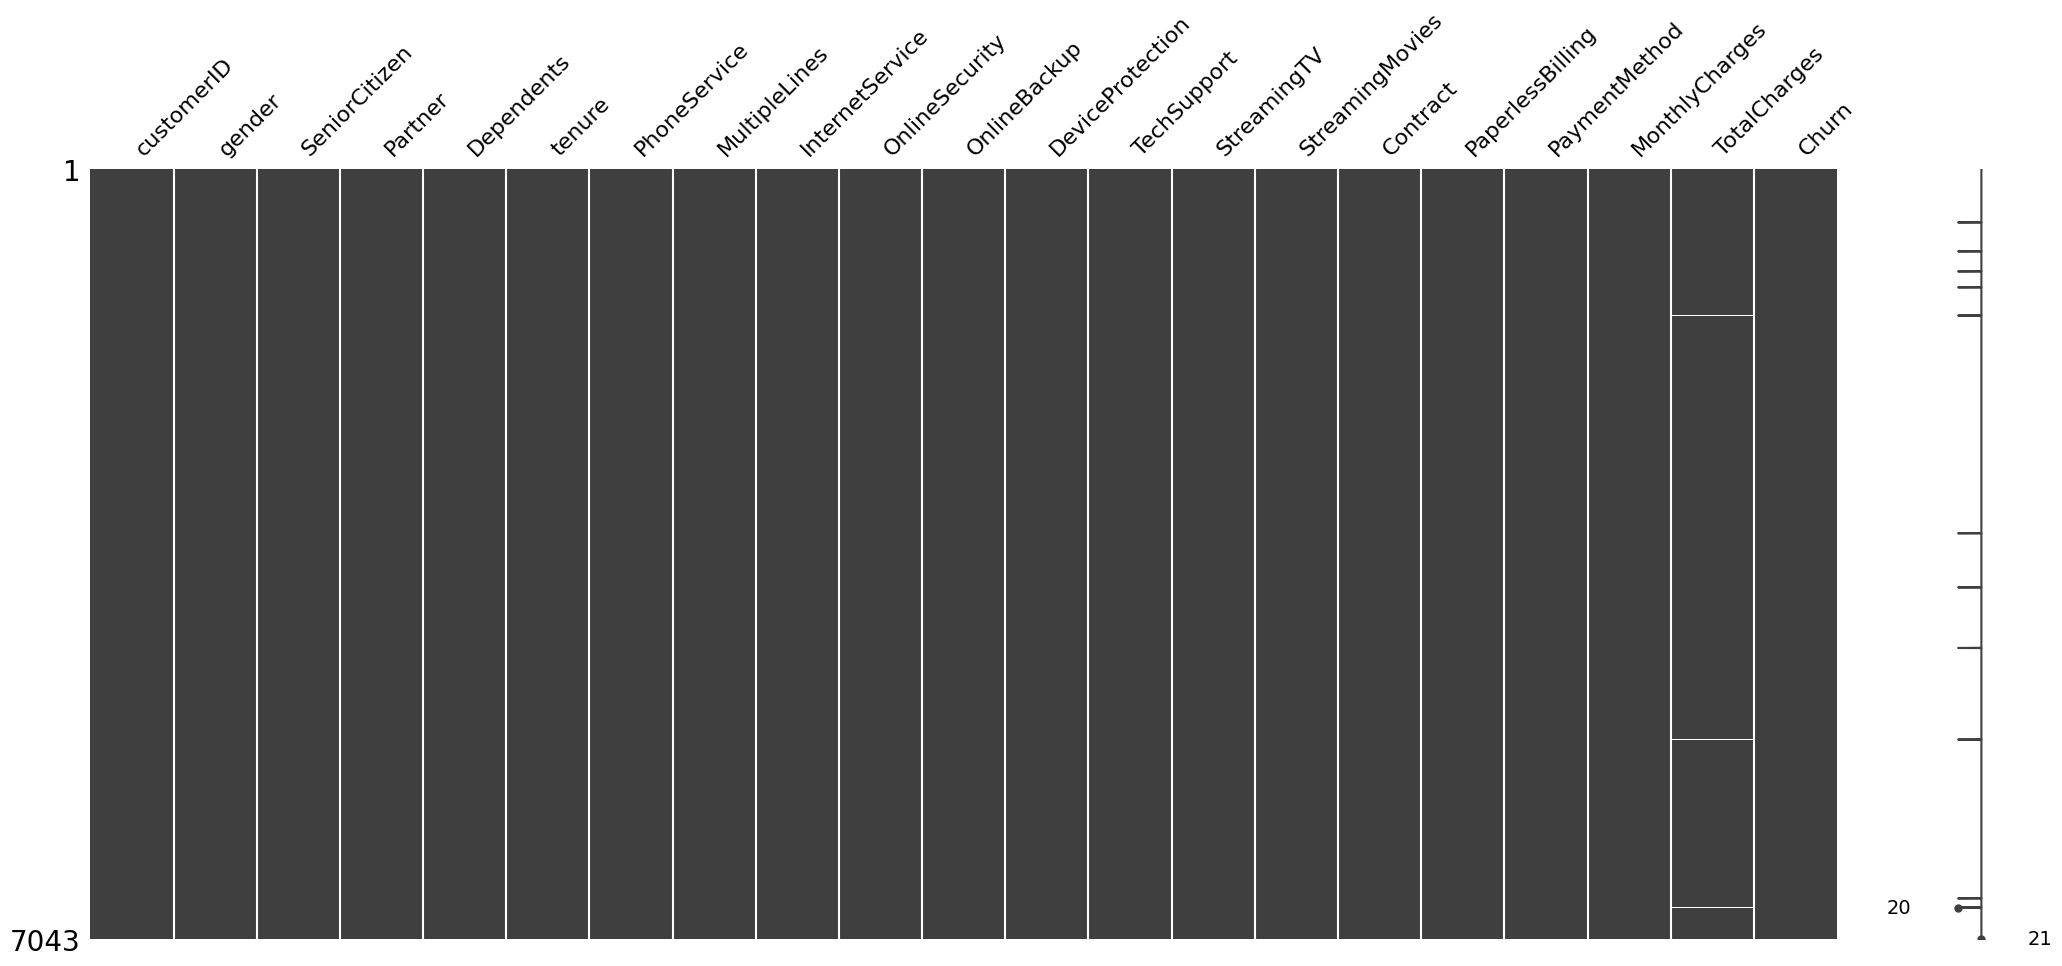

In [12]:
import matplotlib.pyplot as plt
import missingno as msno
#checking if there are missing data
msno.matrix(teleco_churn)
plt.show()

Total charges seems to have 11 missing values

In [13]:
teleco_churn['TotalCharges'].isna().sum()

np.int64(11)

In [14]:
#checking missing values
TotalCharges_missing = teleco_churn[teleco_churn['TotalCharges'].isna()]
TotalCharges_missing

customerID  gender SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female             0     Yes        Yes       0   
753   3115-CZMZD    Male             0      No        Yes       0   
936   5709-LVOEQ  Female             0     Yes        Yes       0   
1082  4367-NUYAO    Male             0     Yes        Yes       0   
1340  1371-DWPAZ  Female             0     Yes        Yes       0   
3331  7644-OMVMY    Male             0     Yes        Yes       0   
3826  3213-VVOLG    Male             0     Yes        Yes       0   
4380  2520-SGTTA  Female             0     Yes        Yes       0   
5218  2923-ARZLG    Male             0     Yes        Yes       0   
6670  4075-WKNIU  Female             0     Yes        Yes       0   
6754  2775-SEFEE    Male             0      No        Yes       0   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
488            No            No             DSL            Yes  ...   
753           Yes            No              No             No  ...   
936           Yes            No             DSL            Yes  ...   
1082          Yes           Yes              No             No  ...   
1340           No            No             DSL            Yes  ...   
3331          Yes            No              No             No  ...   
3826          Yes           Yes              No             No  ...   
4380          Yes            No              No             No  ...   
5218          Yes            No              No             No  ...   
6670          Yes           Yes             DSL             No  ...   
6754          Yes           Yes             DSL            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies  Contract  \
488               Yes         Yes         Yes              No  Two year   
753                No          No          No              No  Two year   
936               Yes          No         Yes             Yes  Two year   
1082               No          No          No              No  Two year   
1340              Yes         Yes         Yes              No  Two year   
3331               No          No          No              No  Two year   
3826               No          No          No              No  Two year   
4380               No          No          No              No  Two year   
5218               No          No          No              No  One year   
6670              Yes         Yes         Yes              No  Two year   
6754               No         Yes          No              No  Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
488               Yes  Bank transfer (automatic)          52.55           NaN   
753                No               Mailed check          20.25           NaN   
936                No               Mailed check          80.85           NaN   
1082               No               Mailed check          25.75           NaN   
1340               No    Credit card (automatic)          56.05           NaN   
3331               No               Mailed check          19.85           NaN   
3826               No               Mailed check          25.35           NaN   
4380               No               Mailed check          20.00           NaN   
5218              Yes               Mailed check          19.70           NaN   
6670               No               Mailed check          73.35           NaN   
6754              Yes  Bank transfer (automatic)          61.90           NaN   

      Churn  
488      No  
753      No  
936      No  
1082     No  
1340     No  
3331     No  
3826     No  
4380     No  
5218     No  
6670     No  
6754     No  

[11 rows x 21 columns]

after inspections it seems like customers with zero tenure have missing total charges values meaning they had just joined the service and had not incurred any charges. Since these customers had not stayed long enough to be billed, it is logical to set their TotalCharges to 0

In [15]:
#confirming there are no missing values
teleco_churn.loc[(teleco_churn['tenure'] == 0) & (teleco_churn['TotalCharges'].isnull()), 'TotalCharges'] = 0
teleco_churn['TotalCharges'].isna().sum()

np.int64(0)

# Duplicate Rows

In [16]:
teleco_churn.duplicated().sum()

np.int64(0)

we have no duplicates

# **2. Exploratory Data Analysis (EDA)**


# 2.1 Univariate analysis

**Numerical Feature Analysis**

In [17]:
# Select relevant numerical columns for analysis
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Calculate central tendency measures
central_tendency = {}
for column in numerical_columns:
    central_tendency[column] = {
        'Mean': teleco_churn[column].mean(),
        'Median':teleco_churn[column].median(),
        'Mode': teleco_churn[column].mode().iloc[0]
    }
central_tendency_df = pd.DataFrame(central_tendency).T

central_tendency_df

Mean   Median   Mode
tenure            32.371149    29.00   1.00
MonthlyCharges    64.761692    70.35  20.05
TotalCharges    2279.734304  1394.55   0.00



1.   Tenure:

*   **Mean :** customers churn after staying on average 32.37 months
2.   Monthly charges:
* **Mean :** customers are charged on average 64.76 dollars per month
3. Total charges :
* **Mean :** total charges during period spend with the company are on average 2279.73 dollars




In [18]:
def calculate_dispersion(teleco_churn, numerical_columns):
    dispersion_measures = {}

    for column in numerical_columns:
        dispersion_measures[column] = {
            'Range': teleco_churn[column].max() - teleco_churn[column].min(),
            'Variance': teleco_churn[column].var(),
            'Standard Deviation': teleco_churn[column].std(),
            'IQR': teleco_churn[column].quantile(0.75) - teleco_churn[column].quantile(0.25)
        }

    return pd.DataFrame(dispersion_measures).T

# List of numerical columns to analyze
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']


# Calculate dispersion measures
dispersion_df = calculate_dispersion(teleco_churn, numerical_columns)

dispersion_df

Range      Variance  Standard Deviation      IQR
tenure            72.0  6.031681e+02           24.559481    46.00
MonthlyCharges   100.5  9.054109e+02           30.090047    54.35
TotalCharges    8684.8  5.138357e+06         2266.794470  3388.05

- Monthly charges exhibit the highest variance due to the different offers that customers choose

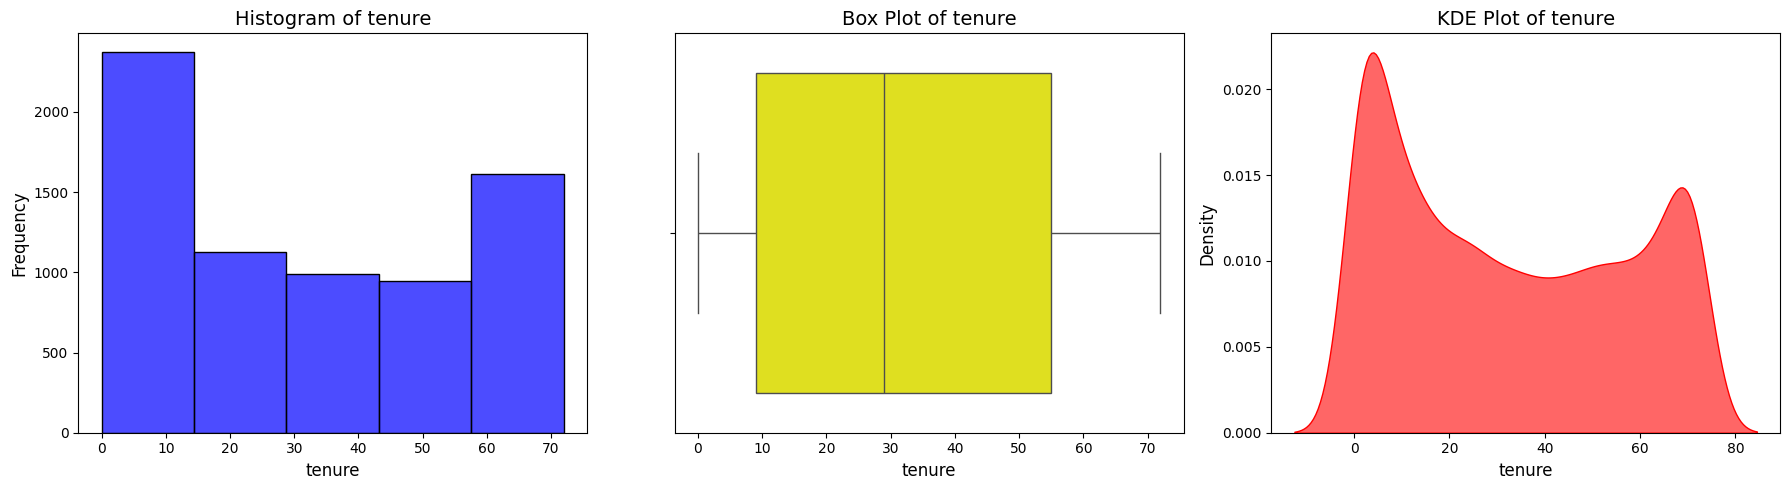

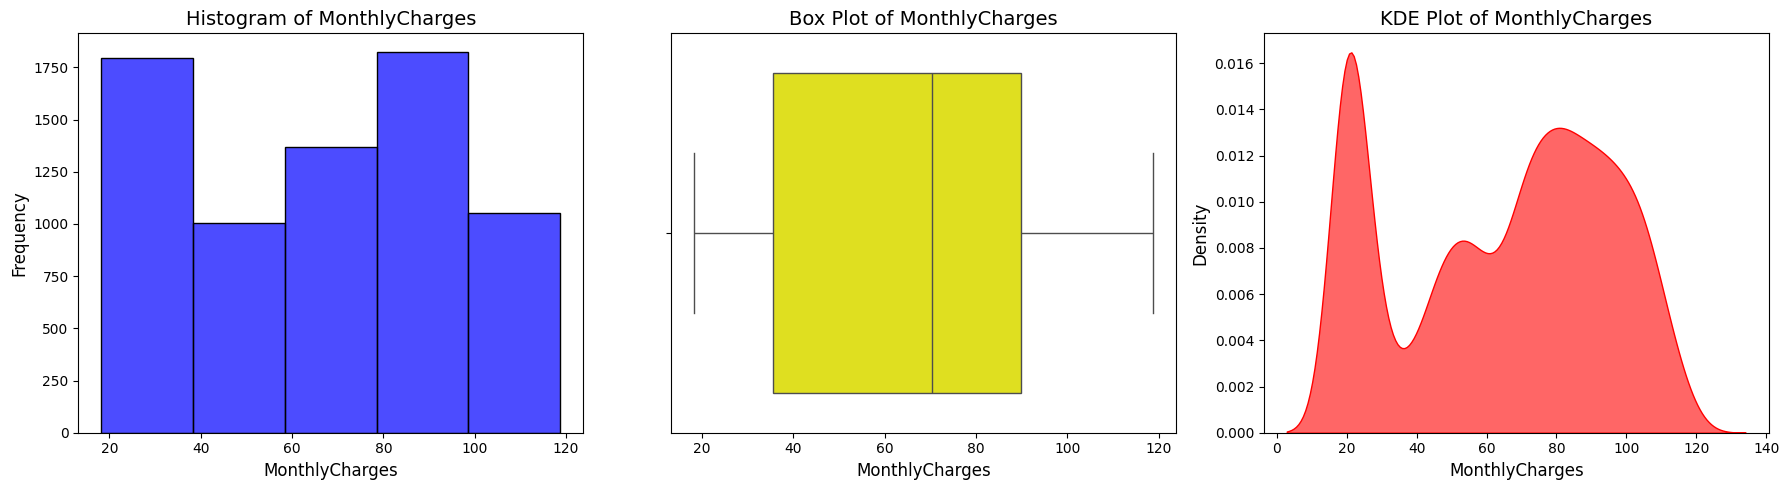

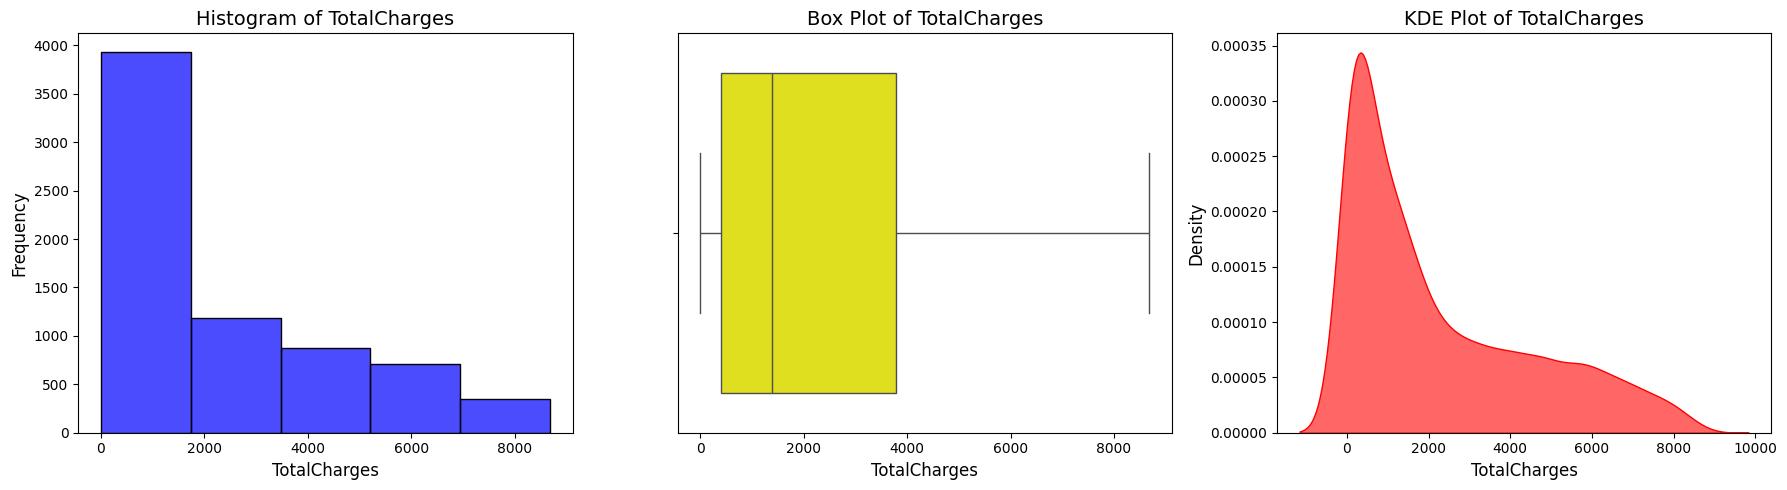

In [19]:
import seaborn as sns
def visualize_distribution(df, numerical_columns):

        # Create a figure for each column
        plt.figure(figsize=(18, 5))

        # Histogram
        plt.subplot(1, 3, 1)
        sns.histplot(df[column], kde=False, bins=5, color='blue', alpha=0.7)
        plt.title(f"Histogram of {column}", fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel("Frequency", fontsize=12)

        # Box Plot
        plt.subplot(1, 3, 2)
        sns.boxplot(x=df[column], color='yellow')
        plt.title(f"Box Plot of {column}", fontsize=14)
        plt.xlabel(column, fontsize=12)

        # KDE Plot
        plt.subplot(1, 3, 3)
        sns.kdeplot(df[column], fill=True, color='red', alpha=0.6)
        plt.title(f"KDE Plot of {column}", fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel("Density", fontsize=12)

        plt.tight_layout()
        plt.show()
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
for column in numerical_columns:
  visualize_distribution(teleco_churn, numerical_columns)



1. **Tenure**
- **Histogram** The histogram of tenure is slightly right-skewed, showing that a large number of customers are new or  churned early in their subscription (low tenure). However, there is also a rise toward the higher end, suggesting that a portion of long-term or loyal customers .

- **Box Plot** The box plot reflects a wide spread in customer tenure, ranging from very short-term to long-term clients. The median is approximately 30 months, indicating that half of the customers have a tenure less than or equal to that. The distribution appears fairly symmetric, with no extreme outliers.

- **KDE Plot (Kernel Density Estimation)** The KDE plot indicates a bimodal distribution with two clear peaks:

  - One near 0 months, suggesting a significant number of early churners or new customers.

  - Another around 70 months, indicating that a group of customers tends to stay subscribed for a long time .

2.   **Monthly charges**
- **Histogram** The histogram of MonthlyCharges appears roughly uniform across the range, suggesting that the customers are fairly evenly distributed across different monthly billing amounts. There is no single dominant peak, which indicates a variety of pricing plans.

- **Box Plot** The box plot shows a wide spread of MonthlyCharges, spanning from approximately 40 to 90. The median is around 70, indicating a central tendency toward moderate pricing. The plot appears relatively symmetric, and there are few, if any, extreme outliers.

- **KDE Plot (Kernel Density Estimation)**  The KDE plot provides a smooth representation of the distribution. It reveals a multimodal distribution with three distinct peaks:

   - A prominent peak around low charges (around $20–30)

  - A smaller peak near mid-range charges (around $60)

  - Another peak around higher charges (around $80–90)

  This suggests the presence of three different customer segments — possibly linked to different subscription tiers or service packages



3. **Total charges**
- **Histogram** The histogram of TotalCharges is right-skewed (positively skewed), indicating that the majority of customers have relatively low total charges. This likely reflects customers who churned early or had short tenures.

- **Box Plot** The box plot also highlights the skewness, with a concentration of values in the lower range. The median is around 1,400, and the interquartile range (IQR) spans roughly from 10 to 4,000. The long upper whisker shows that some customers have very high lifetime charges, possibly due to long-term loyalty.

- **KDE Plot (Kernel Density Estimation)** The KDE plot confirms the strong right skew, with a single sharp peak near the lower end (around $200–400). The density gradually tapers off as charges increase, suggesting that only a small portion of customers generate high total revenue over time.

**Categorical Feature Analysis**

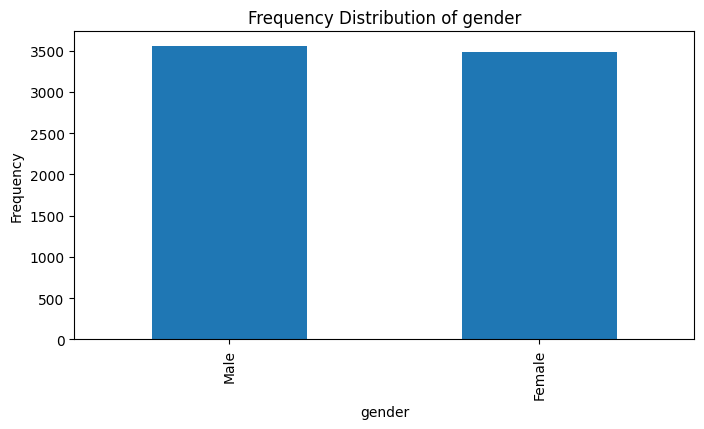

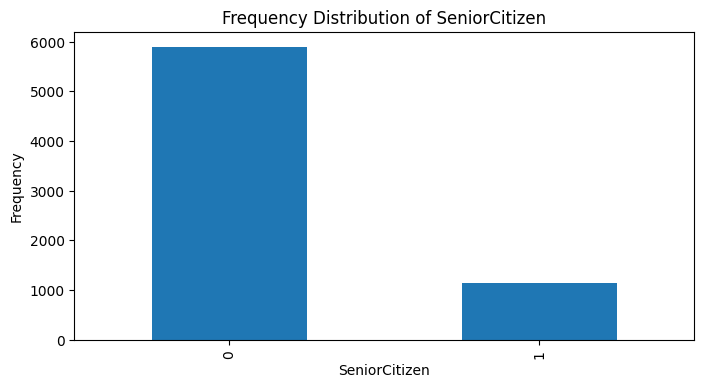

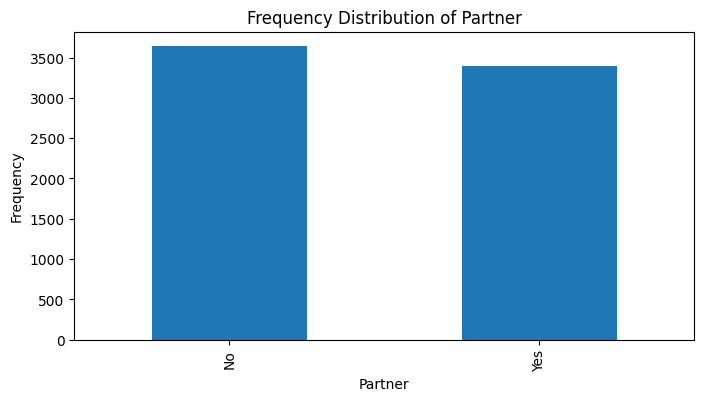

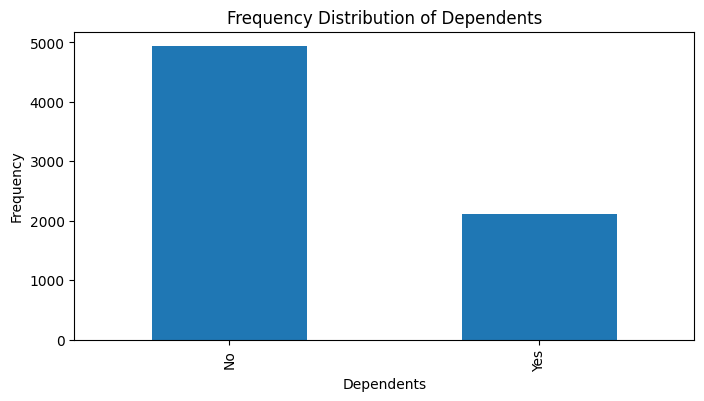

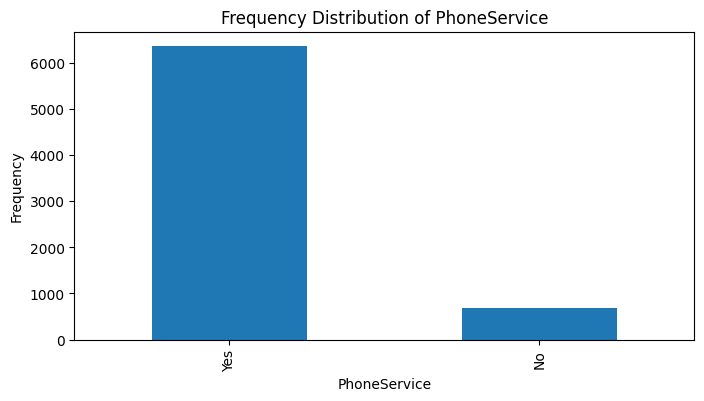

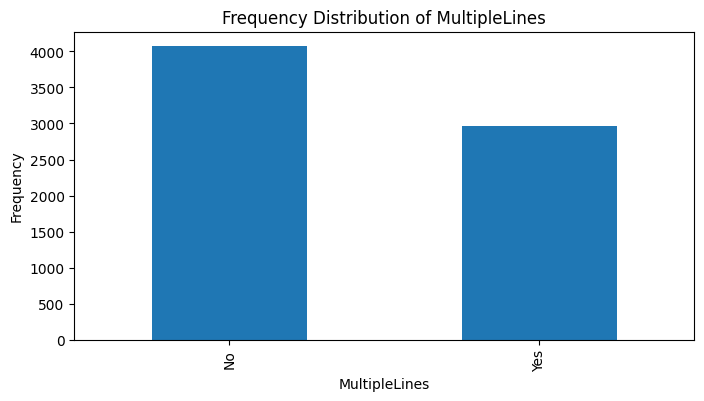

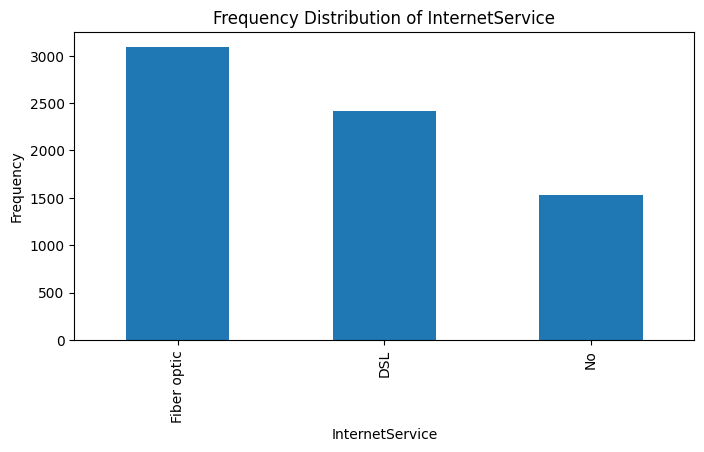

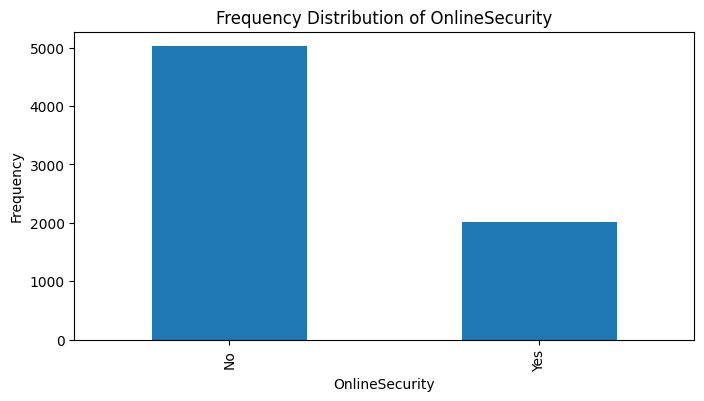

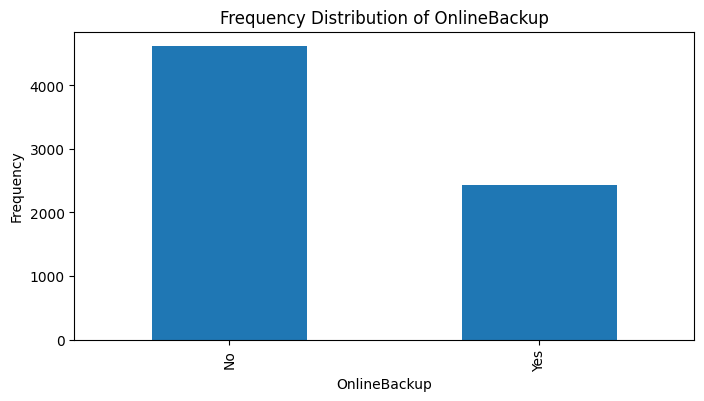

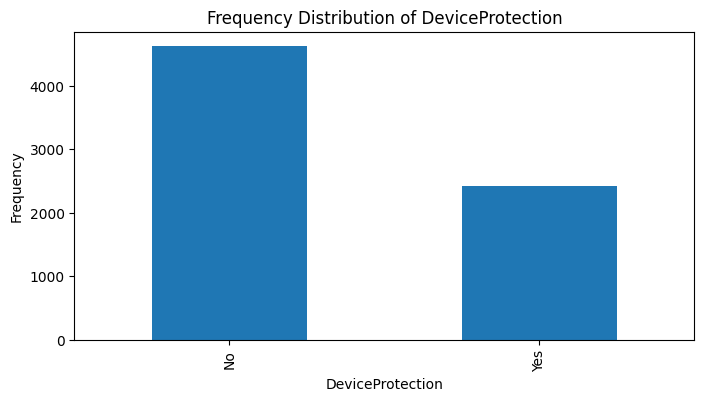

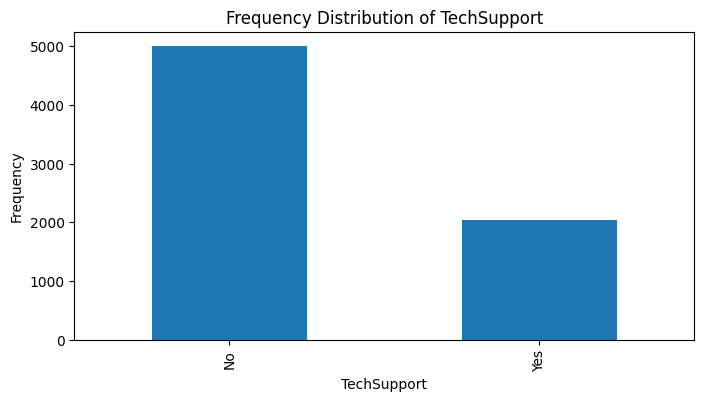

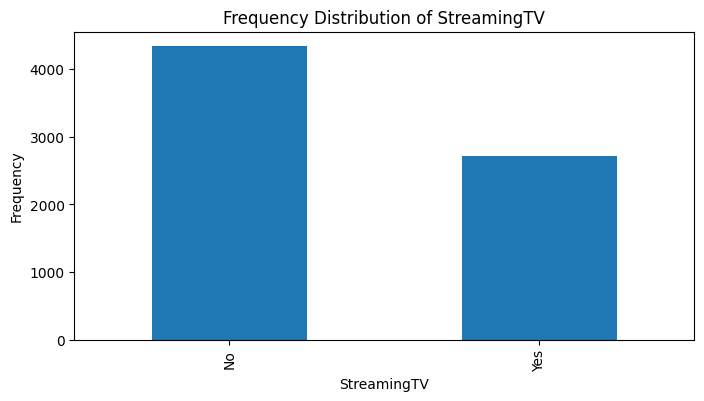

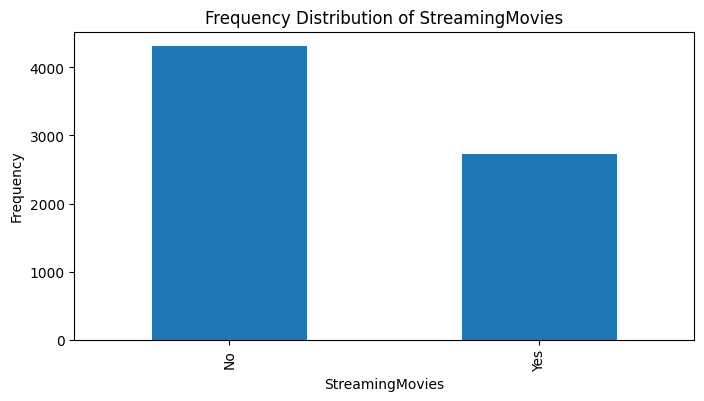

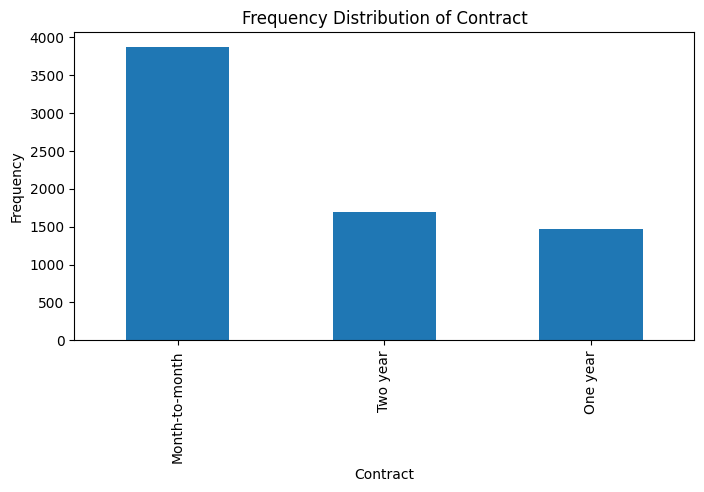

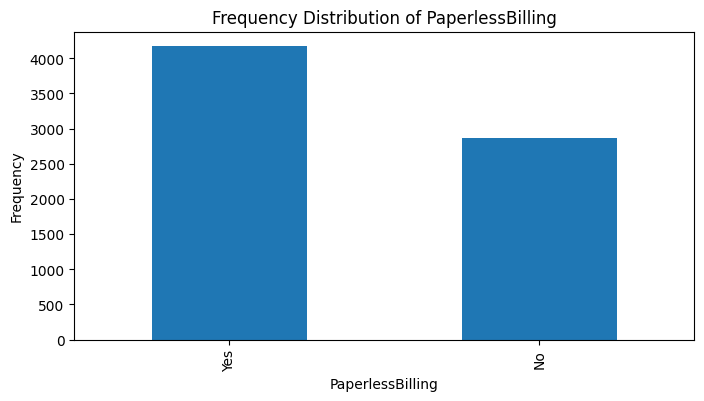

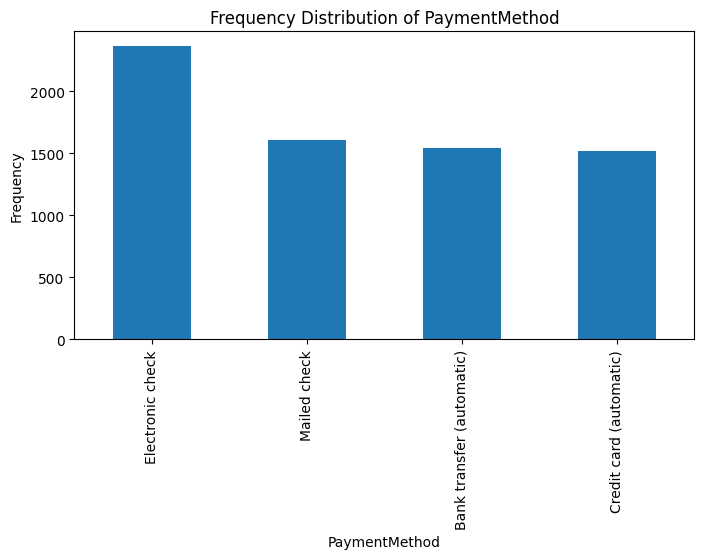

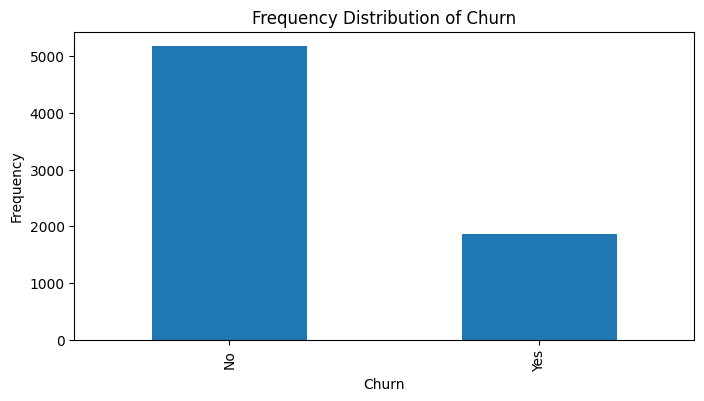

In [20]:
# Frequency distribution for each categorical column
for column in teleco_churn.select_dtypes(include='category').columns:
    plt.figure(figsize=(8, 4))
    teleco_churn[column].value_counts().plot(kind='bar')
    plt.title(f'Frequency Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

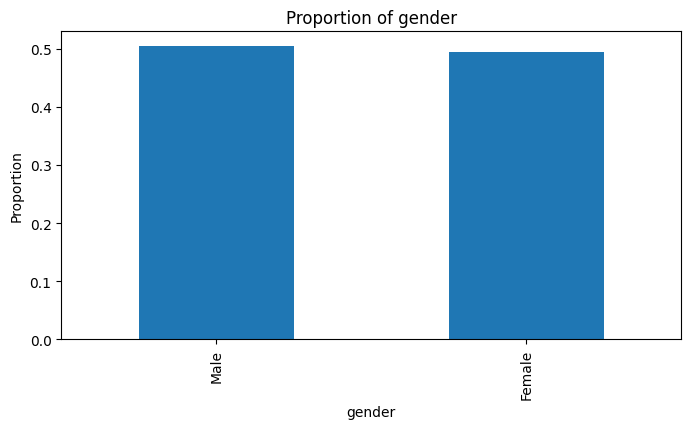

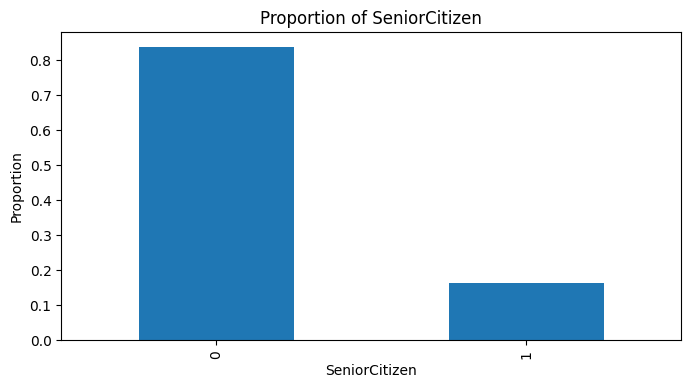

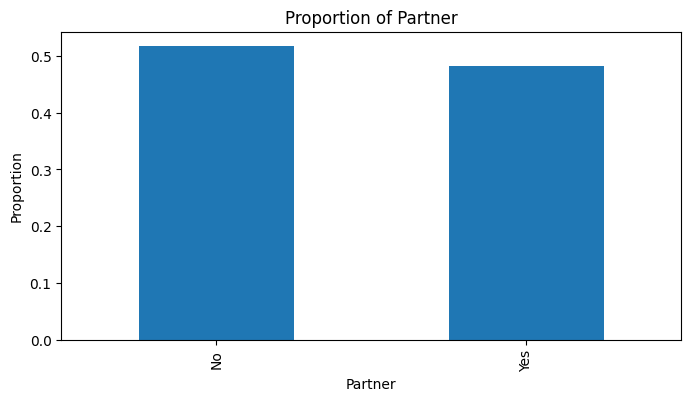

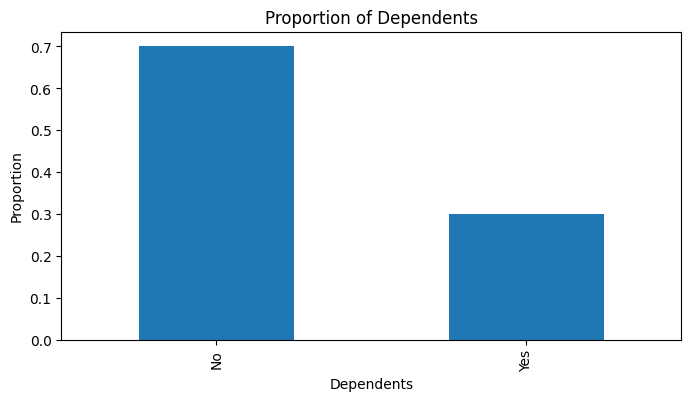

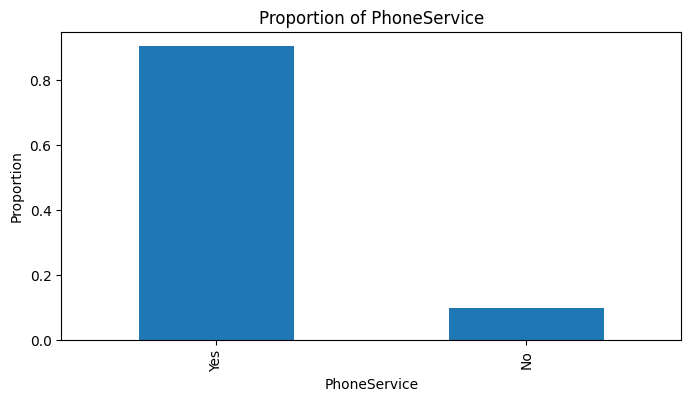

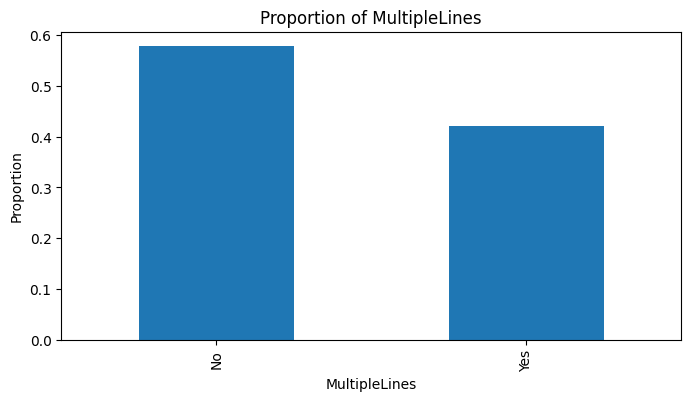

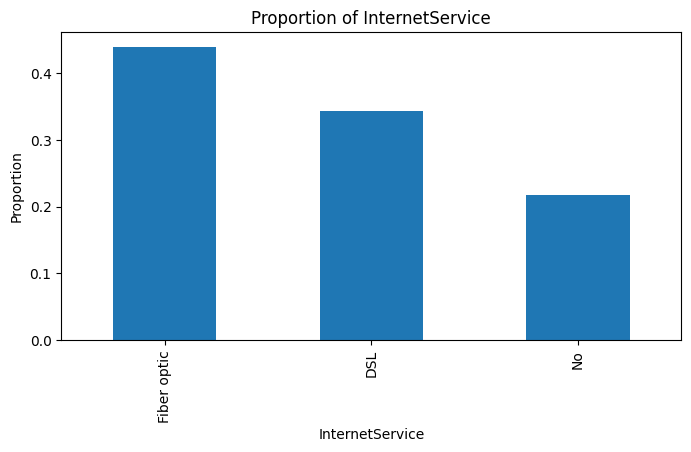

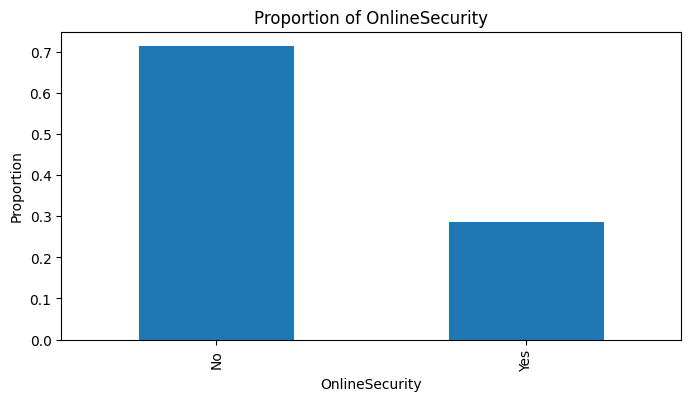

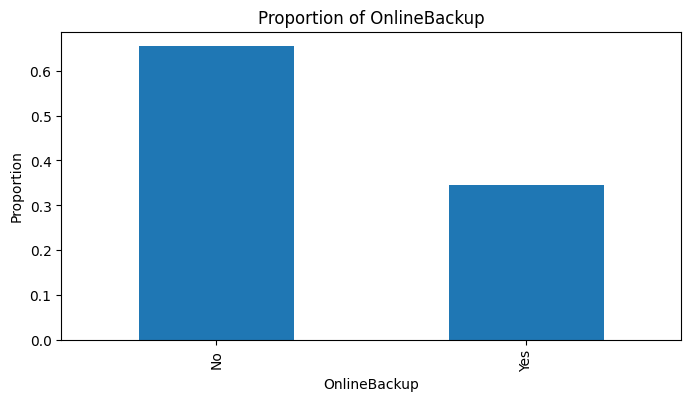

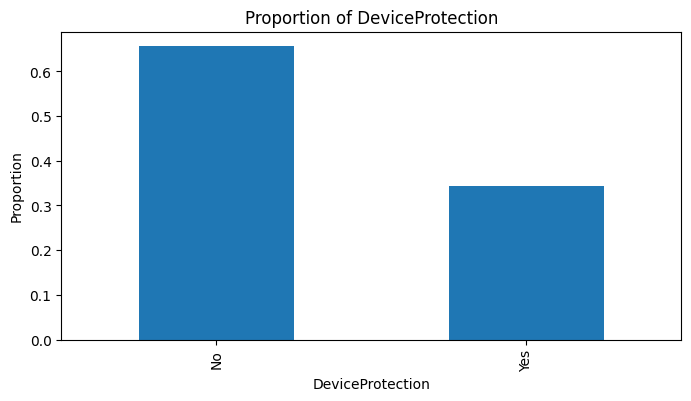

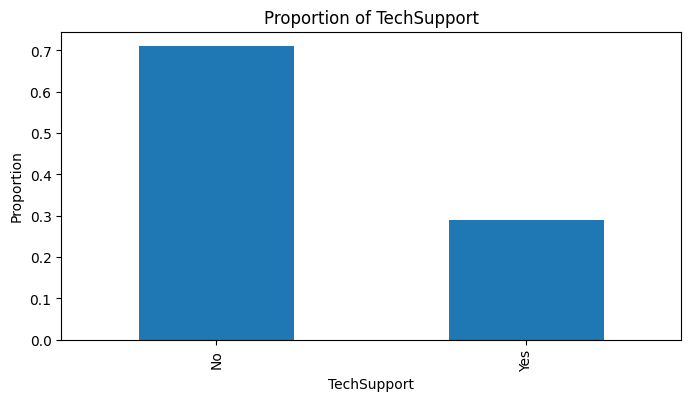

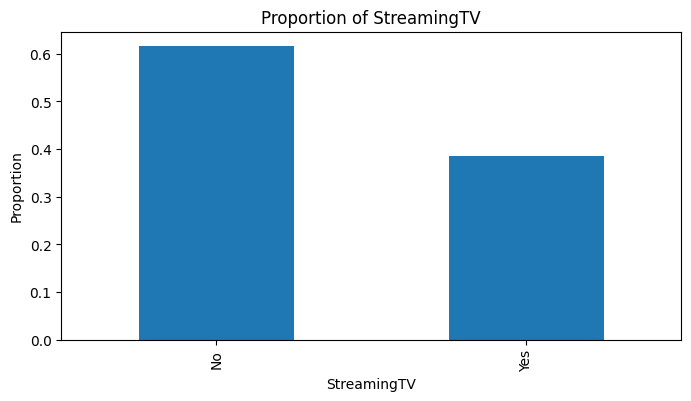

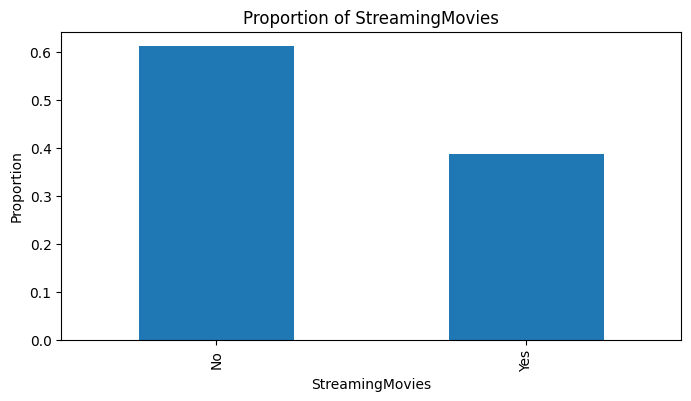

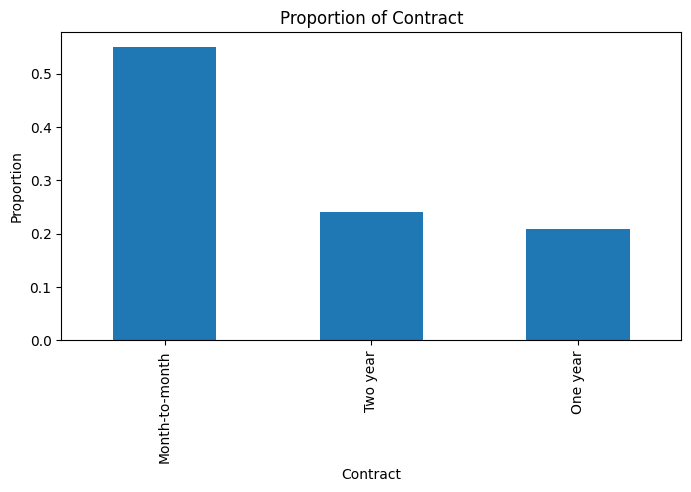

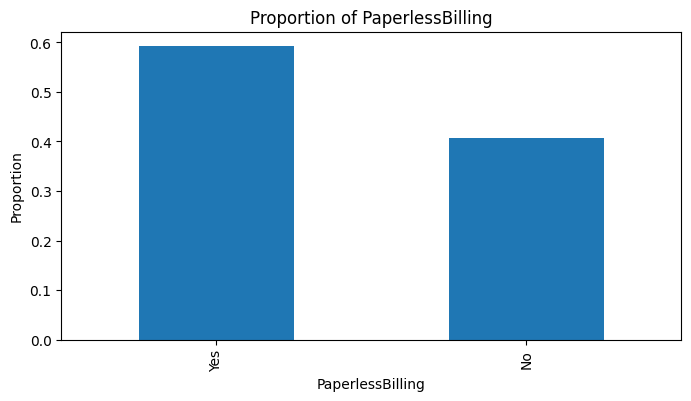

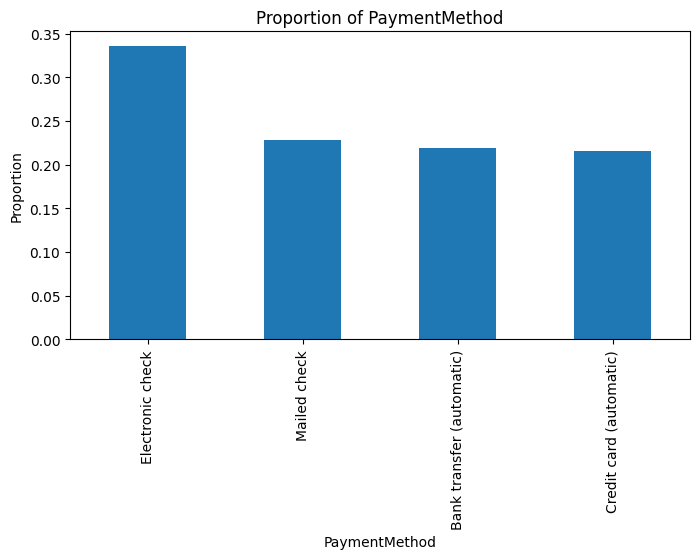

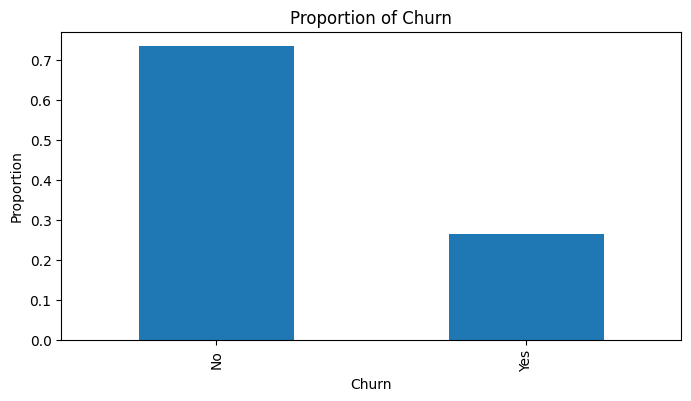

In [21]:
# Proportion for each categorical column
for column in teleco_churn.select_dtypes(include='category').columns:
    plt.figure(figsize=(8, 4))
    teleco_churn[column].value_counts(normalize=True).plot(kind='bar')
    plt.title(f'Proportion of {column}')
    plt.xlabel(column)
    plt.ylabel('Proportion')

1. **Gender** our data contains equal number of males and females
2. **Senior citizen** we have a small number of senior citizens about 20%
3. **Partner** customers with partners and those without are roughly equal
4. **Dependents** 70% of clients dont have dependents
5. **Phone Service** more than 80% of the customers are subscribed to the phone service
6. **Multiple Lines** even thos most of the customers have phone service only 45% of them have multiple lines
7. **Internet service** about 45% of customers have fiber optic as their internet service while 35% adopted DSL and approximetly 20% dont have any internet service
8. **Online Security** 70% of clients do not have online security
9. **Online Backup** about 65% of customers do not have online backup
10. **Device Protection** about 65% of customers do not have Device Protection
11. **Tech support** 70% of clients did not have tech support
12. **Streaming TV** 60% of clients do not have Streaming TV
13. **Streaming Movies** 60% of clients do not have Streaming movies
14. **Contract** more than 50% of customers have a month to month contract while the rest are roughly equally distributed between having a one year contract and a two year contract
15. **Paperless payment** 60% of customers adopt paperless payment for their charges
16. **Payment method** about 35% use electronic check to pay , while the rest are equally divided between using mailed check ,bank transfer ,or credit card to make the payment of their telecom charges  

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


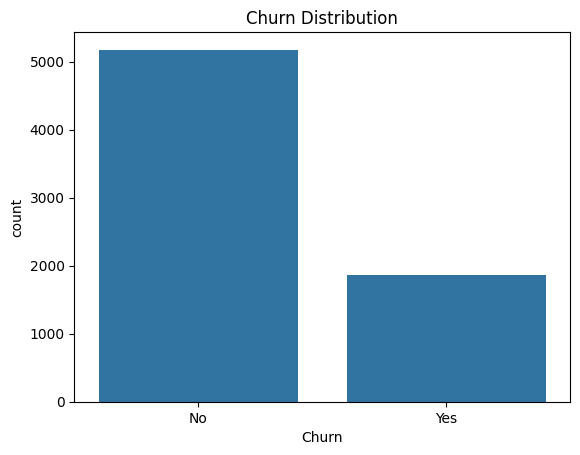

In [22]:
print(teleco_churn['Churn'].value_counts(normalize=True))

sns.countplot(data=teleco_churn, x='Churn')
plt.title("Churn Distribution")
plt.show()

**Churn** is our target variable . the plot indicates that 74% of the studied customers are not churners which is a good sign indicating a good retention strategy

# 2.2 Bivariate Analysis

**Categorical vs Target (Churn)**

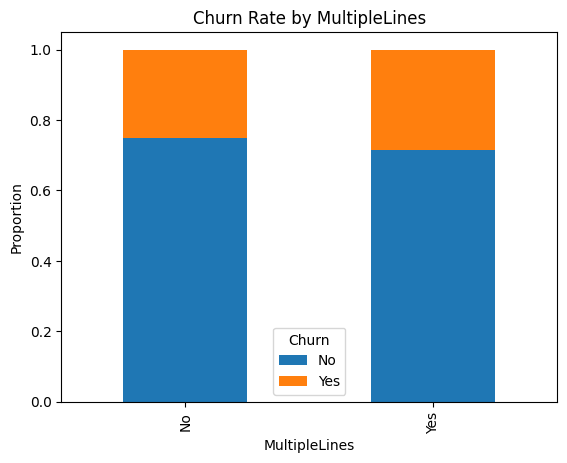

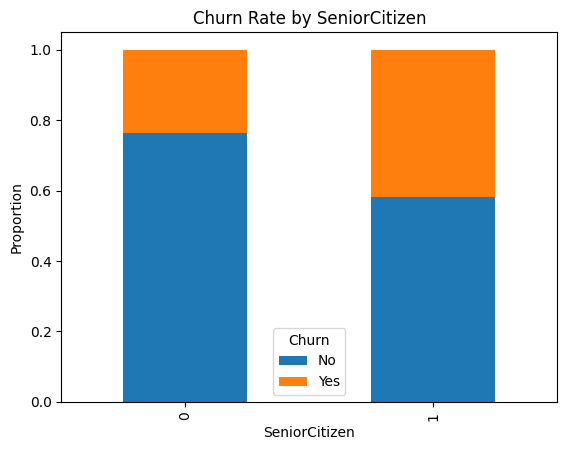

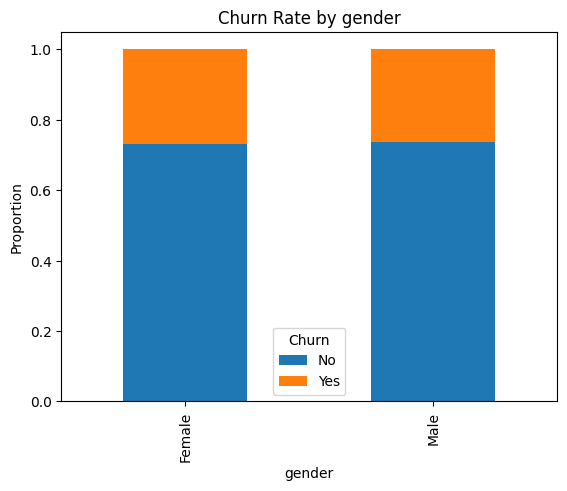

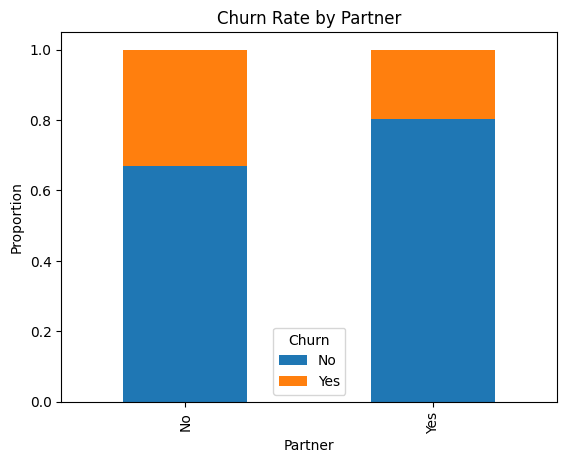

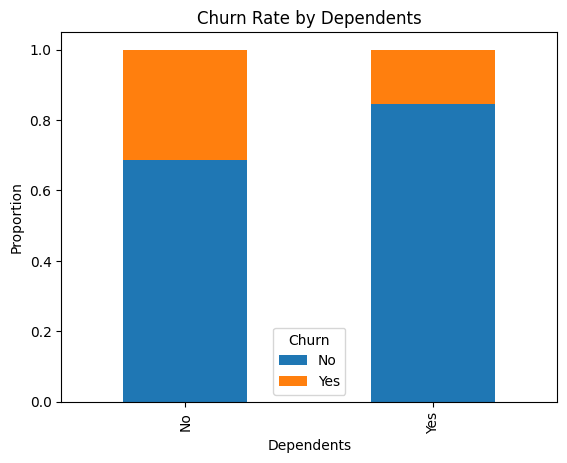

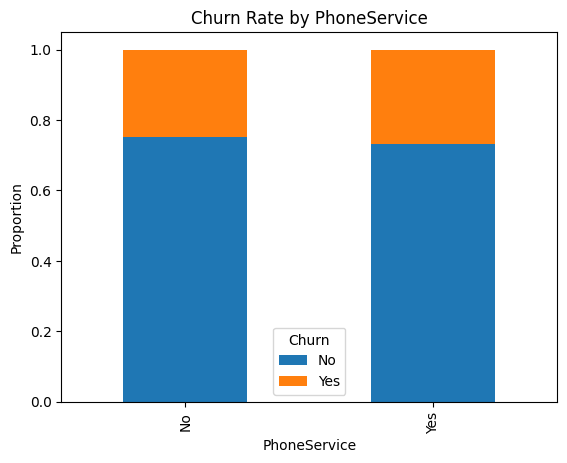

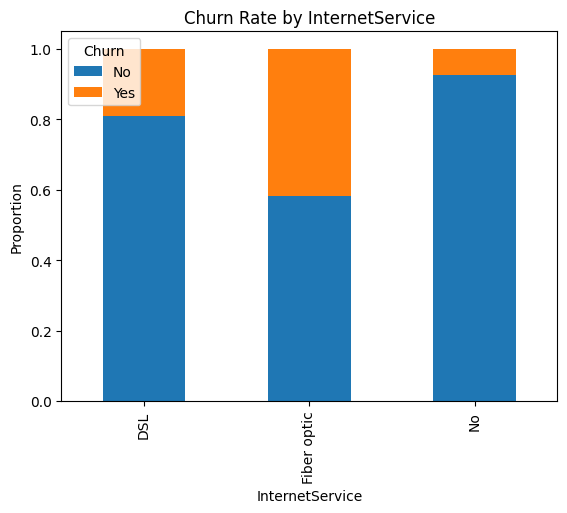

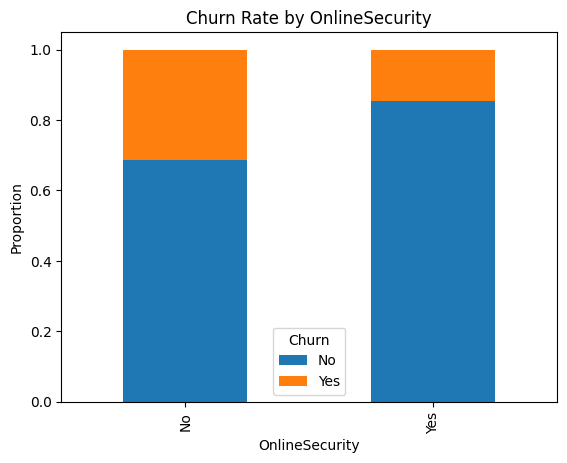

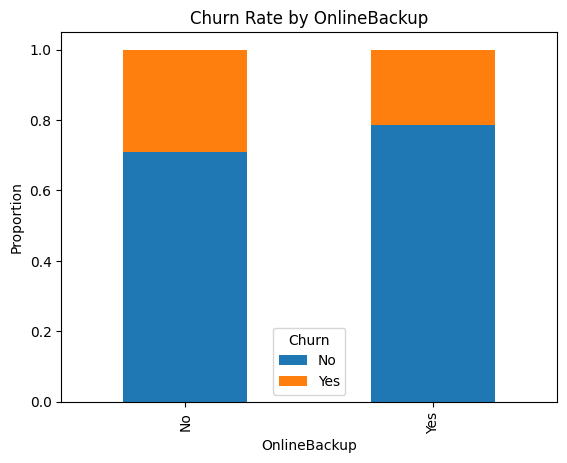

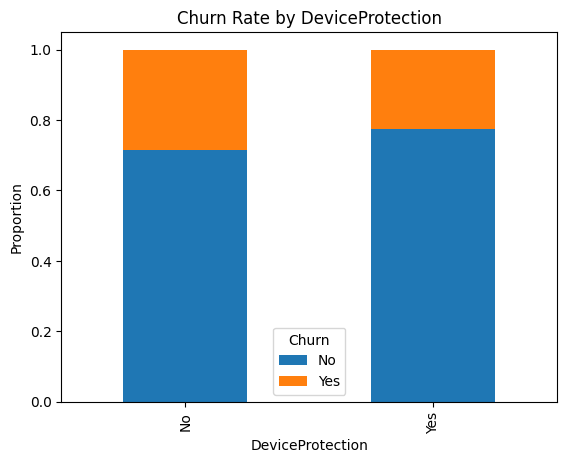

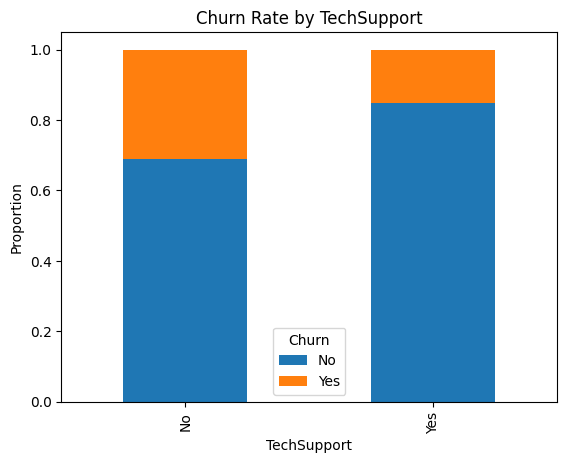

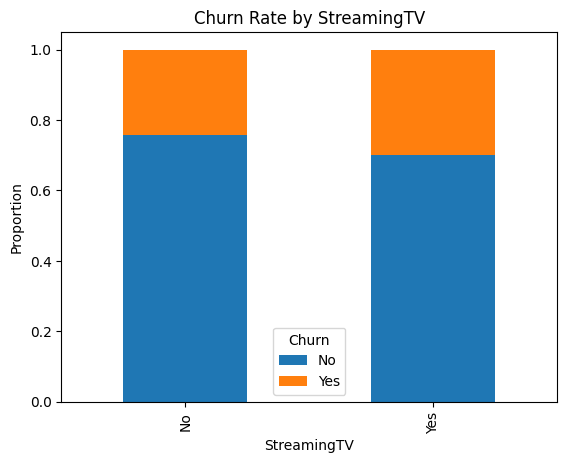

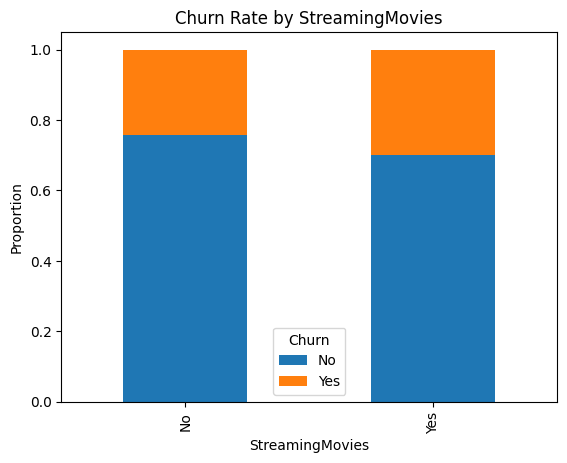

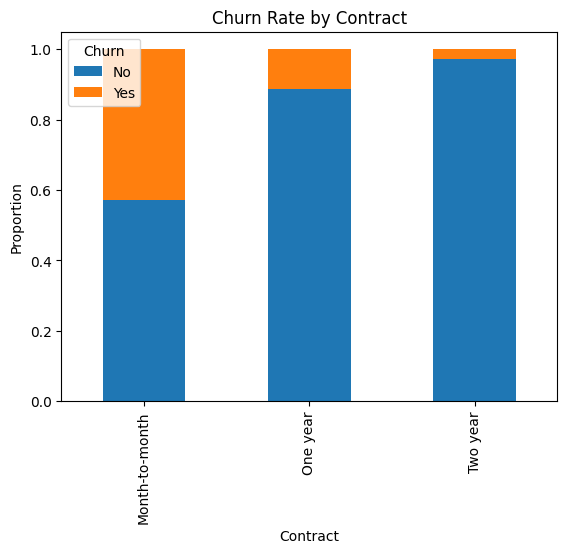

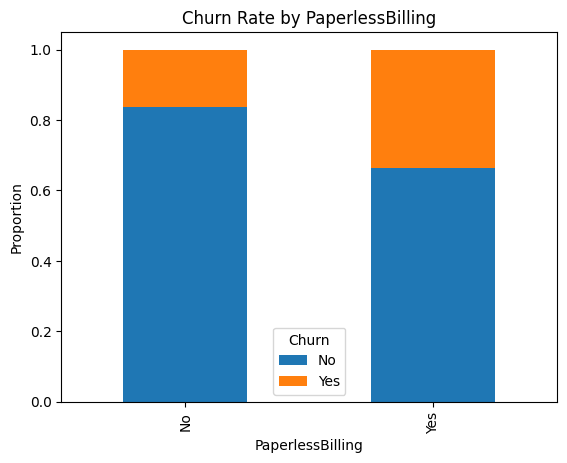

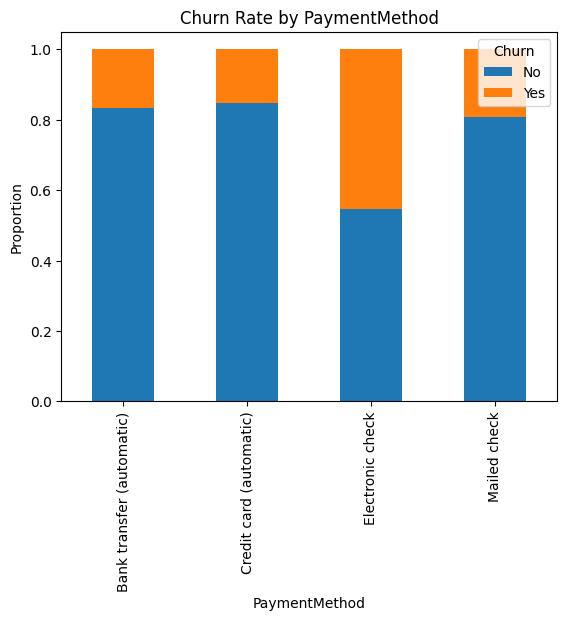

In [23]:
for col in cat_cols:
    if col != 'Churn':
        ct = pd.crosstab(teleco_churn[col], teleco_churn['Churn'], normalize='index')
        ct.plot(kind='bar', stacked=True)
        plt.title(f"Churn Rate by {col}")
        plt.ylabel("Proportion")
        plt.show()

1. **churn rate by multiple lines** whether the customer has multiple lines or not the proportion of churn is similar with most customers being non churners
2. **churn rate by senior citizen** 40% senior citizen  churn whereas only 20% of younger citizens churn
3. **churn rate by gender** gender doesnt affect rate of churn since both male and female have the proportion of churners being 20%
4. **churn rate by partner ** those with no partner are more likely to churn with 25% of them being churners whereas only 20% of those with partner churn
5. **churn rate by dependents** those with no dependents are more likely to churn with about 25% of them being churners
6. **churn rate by phone service** having a phone service or not doesnt make a difference in terms of churn rate since both have similar percentages
7. **churn rate by internet service** customers with fiber optic as their internet service tend to churn more with 40% while those who dont have internet churn the least with only 5%
8. **churn rate by online security** those without online security churn more with 30%
9. **churn rate by online backup** those without online backup churn more with 30%
10. **churn rate by device protection** roughly same proportion of churners for those with and without device protection
11. **churn rate by tech support** those without tech supportchurn more with 30%
12. **churn rate by streaming tv** roughly same proportion of churners for those with and without streaming tv subscribtion
13. **churn rate by streaming movies** roughly same proportion of churners for those with and without streaming movies subscribtion
14. **churn rate by contract** customers with a month to month contract tend to churn the most with 40% while those with a one year contract churn the least with a rate less than 5%
15. **churn rate by paperless payment** customers who adopt paperless payment tend to churn more than those who dont with a rate of 30%
16. **churn rate by payment method** customers who use electronic churn the most with 40% while customers who adopt other payment methods have a roughly similar rate of churning

**Numerical vs Target (Churn)**

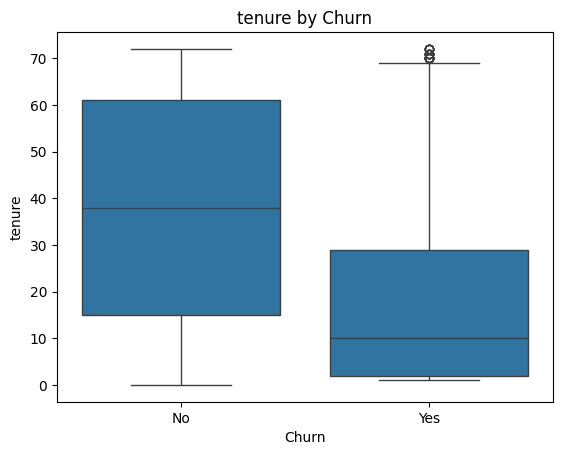

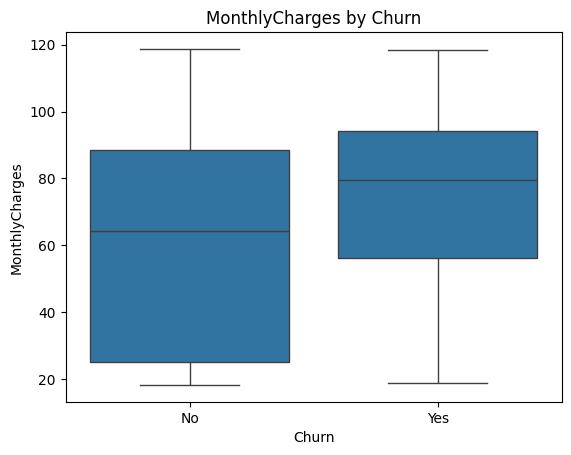

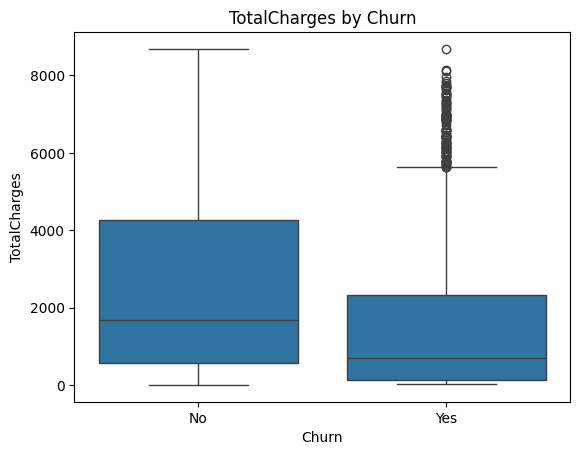

In [24]:
for col in numerical_columns:
    if col != 'Churn':
        sns.boxplot(x='Churn', y=col, data=teleco_churn)
        plt.title(f"{col} by Churn")
        plt.show()

1. **tenure by churn** Customers who churned ("Yes") tend to have much lower tenure:

  - Median tenure is around 10 months.

  - Most churning customers stayed less than 30 months.

   - There are a few outliers who churned after long tenure (close to 70 months), but they are rare.

 Customers who did not churn ("No") generally have much higher tenure:

  - Median tenure is around 38 months.

  - The interquartile range (middle 50%) spans from about 15 to 61 months, showing they’ve been with the company for a significantly longer time.

 - Very few short-tenure customers are found in this group
2.**monthly charges by churn** Customers who churned ("Yes") tend to have much higher monthly charges:
  - Median monthly charges is around 80 dollars
  - Most churning customers paid less than 80 dollars

 Customers who did not churn ("No") generally have bit lower monthly charges:
  - Median  monthly charges are around 60 dollars
  - Non churning customers are roughly equally divided between those who pay more than 60 and those who pay less than 60
  - There is a good portion of non churners who pay low monthly charges
3. **Total charges by churn**Customers who churned ("Yes") tend to have much lower total charges:
  - Median total charges is around 1000 dollars
  - Most churning customers have payed more than 1000 dollars
  - There are a lot of outliers that payed more than 6000 dollars

Customers who did not churn ("No") generally have much higher total charges:
  - Median total charges is around 2000 dollars
  - Most of non churning customers paid more than 2000 dollars


# 3. Encoding & Feature Engineering

In [25]:
import pandas as pd

# Make a copy of your original dataframe before encoding
df_encoded = teleco_churn.copy()
df_raw = teleco_churn.copy()  # Keep this for mapping reference

# 1. Identify all categorical columns
cat_cols = teleco_churn.select_dtypes(include='category').columns.tolist()

# 2. Separate binary Yes/No columns from multi-category
yes_no_cols = [col for col in cat_cols if sorted(teleco_churn[col].dropna().unique()) == ['No', 'Yes']]
multi_cat_cols = [col for col in cat_cols if col not in yes_no_cols]

# 3. Encode Yes/No as 1/0
df_encoded[yes_no_cols] = df_encoded[yes_no_cols].replace({'Yes': 1, 'No': 0})

# 4. Create mapping dictionary for multi-category columns
mapping_dict = {}

for col in multi_cat_cols:
    categories = sorted(df_raw[col].dropna().unique())
    dropped_category = categories[0]
    encoded_columns = [f"{col}_{cat}" for cat in categories[1:]]

    mapping_dict[col] = {
        "Original Categories": categories,
        "Dropped (default)": dropped_category,
        "Encoded Columns": encoded_columns,
        "Meaning": {f"{col}_{cat}": f"{col} == '{cat}'" for cat in categories[1:]}
    }

# 5. One-hot encode multi-category columns
df_encoded = pd.get_dummies(df_encoded, columns=multi_cat_cols, drop_first=True)

# 6. Convert any boolean columns (from get_dummies) to integers
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

# 7. Check final encoded DataFrame
print("Encoded DataFrame shape:", df_encoded.shape)
print("\nFirst 5 columns:", df_encoded.columns[:5])
print("\nLast 5 columns:", df_encoded.columns[-5:])

# 8. Optional: Display mapping dictionary
from pprint import pprint
pprint(mapping_dict)


Encoded DataFrame shape: (7043, 25)

First 5 columns: Index(['customerID', 'Partner', 'Dependents', 'tenure', 'PhoneService'], dtype='object')

Last 5 columns: Index(['Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')
{'Contract': {'Dropped (default)': 'Month-to-month',
              'Encoded Columns': ['Contract_One year', 'Contract_Two year'],
              'Meaning': {'Contract_One year': "Contract == 'One year'",
                          'Contract_Two year': "Contract == 'Two year'"},
              'Original Categories': ['Month-to-month',
                                      'One year',
                                      'Two year']},
 'InternetService': {'Dropped (default)': 'DSL',
                     'Encoded Columns': ['InternetService_Fiber optic',
                                         'InternetService_No'],
                     'Meaning

/tmp/ipython-input-446453525.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded[yes_no_cols] = df_encoded[yes_no_cols].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-446453525.py:15: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_encoded[yes_no_cols] = df_encoded[yes_no_cols].replace({'Yes': 1, 'No': 0})
/tmp/ipython-input-446453525.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in t

In [26]:
df_encoded.head()

customerID Partner Dependents  tenure PhoneService MultipleLines  \
0  7590-VHVEG       1          0       1            0             0   
1  5575-GNVDE       0          0      34            1             0   
2  3668-QPYBK       0          0       2            1             0   
3  7795-CFOCW       0          0      45            0             0   
4  9237-HQITU       0          0       2            1             0   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport  ... Churn  \
0              0            1                0           0  ...     0   
1              1            0                1           0  ...     0   
2              1            1                0           0  ...     1   
3              1            0                1           1  ...     0   
4              0            0                0           0  ...     1   

  gender_Male SeniorCitizen_1  InternetService_Fiber optic  \
0           0               0                            0   
1           1               0                            0   
2           1               0                            0   
3           1               0                            0   
4           0               0                            1   

   InternetService_No Contract_One year  Contract_Two year  \
0                   0                 0                  0   
1                   0                 1                  0   
2                   0                 0                  0   
3                   0                 1                  0   
4                   0                 0                  0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 25 columns]

In [27]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   customerID                             7043 non-null   object  
 1   Partner                                7043 non-null   category
 2   Dependents                             7043 non-null   category
 3   tenure                                 7043 non-null   int64   
 4   PhoneService                           7043 non-null   category
 5   MultipleLines                          7043 non-null   category
 6   OnlineSecurity                         7043 non-null   category
 7   OnlineBackup                           7043 non-null   category
 8   DeviceProtection                       7043 non-null   category
 9   TechSupport                            7043 non-null   category
 10  StreamingTV                            7043 non-null   categ

In [28]:
# Identify columns with category dtype
cat_cols = df_encoded.select_dtypes(include='category').columns

# Convert each to integer (assumes values are already numeric or encoded like 0/1)
df_encoded[cat_cols] = df_encoded[cat_cols].astype(int)
df_encoded.info()
print("Remaining non-numeric columns:", df_encoded.select_dtypes(exclude='number').columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   MultipleLines                          7043 non-null   int64  
 6   OnlineSecurity                         7043 non-null   int64  
 7   OnlineBackup                           7043 non-null   int64  
 8   DeviceProtection                       7043 non-null   int64  
 9   TechSupport                            7043 non-null   int64  
 10  StreamingTV                            7043 non-null   int64  
 11  Stre

# 4. Correlation Analysis & Feature Selection

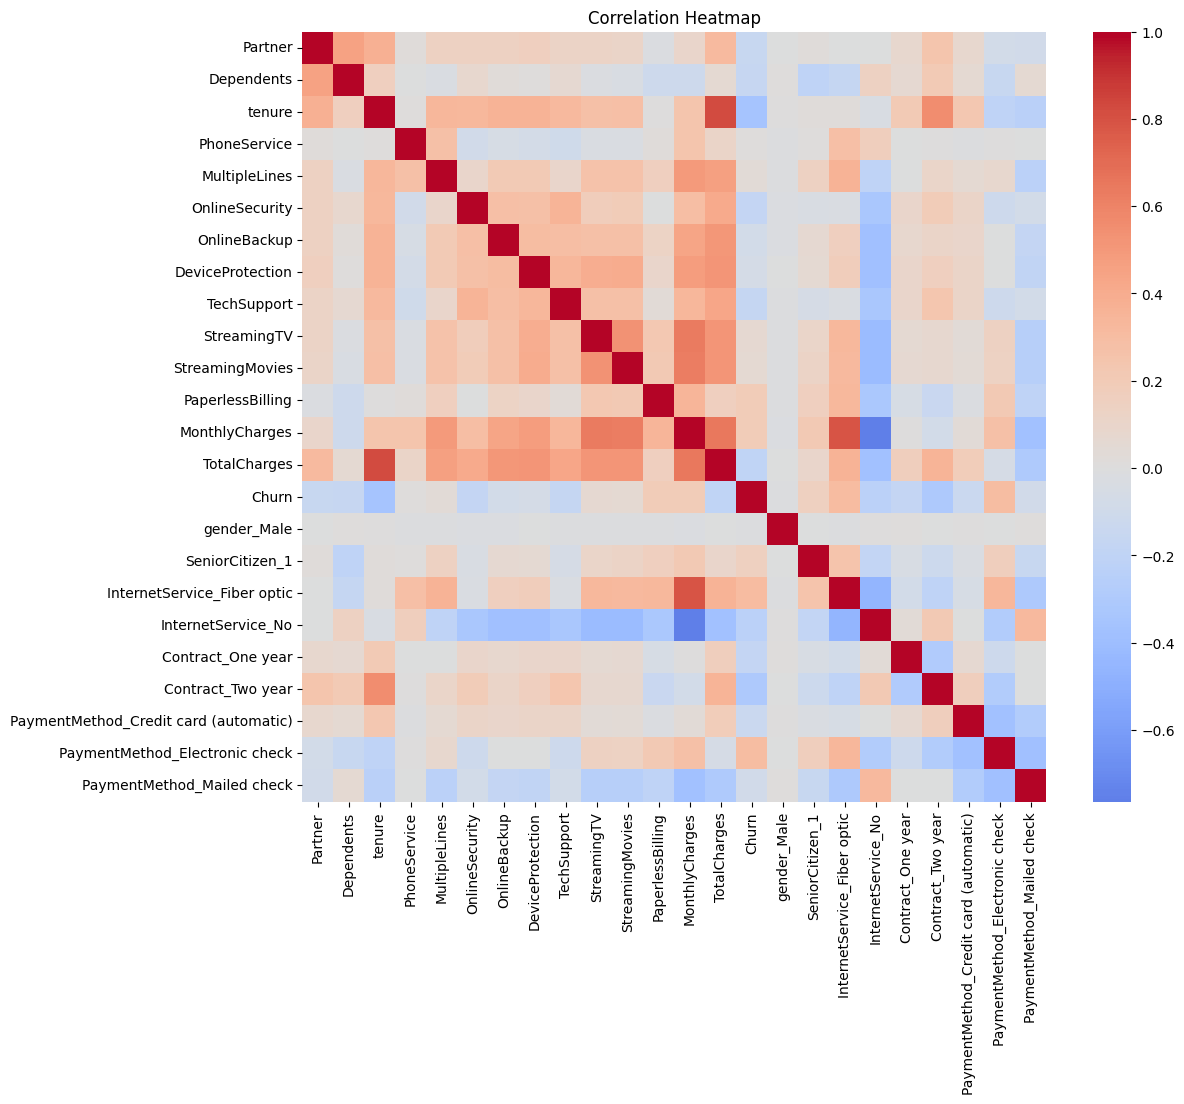

In [29]:
df_corr = df_encoded.select_dtypes(include=['number'])
corr_matrix = df_corr.corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Full heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()



In [30]:
target_corr = corr_matrix['Churn'].sort_values(key=abs, ascending=False)
print(target_corr.head(10))

Churn                             1.000000
tenure                           -0.352229
InternetService_Fiber optic       0.308020
Contract_Two year                -0.302253
PaymentMethod_Electronic check    0.301919
InternetService_No               -0.227890
TotalCharges                     -0.198324
MonthlyCharges                    0.193356
PaperlessBilling                  0.191825
Contract_One year                -0.177820
Name: Churn, dtype: float64


1. tenure has the highest correlation with churn . this correlation is negative meaning those with lower tenure periods tend to churn more
2. Customers with fiber optic as their internet service tend to churn more  since this variable exhibits a positive correlation with churn
3. Customers who do not have a contract of two years churn more since this variable has a negative correlation meaning when customer have a two year contract tend to churn less
4. Clients who adopt electronic check as method of payment tend to churn more given that this variable has a positive correlation with churn

In [31]:
# Only keep numeric data (after encoding)
df_corr = df_encoded.select_dtypes(include='number')

# Compute correlation with Churn
target_corr = df_corr.corr()['Churn'].abs().sort_values(ascending=False)

# Drop 'Churn' itself and keep top features
threshold = 0.05
selected_features = target_corr[(target_corr > threshold) & (target_corr.index != 'Churn')].index.tolist()

print(f"Selected {len(selected_features)} features based on correlation threshold:")
print(selected_features)


Selected 20 features based on correlation threshold:
['tenure', 'InternetService_Fiber optic', 'Contract_Two year', 'PaymentMethod_Electronic check', 'InternetService_No', 'TotalCharges', 'MonthlyCharges', 'PaperlessBilling', 'Contract_One year', 'OnlineSecurity', 'TechSupport', 'Dependents', 'SeniorCitizen_1', 'Partner', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies']


In [32]:
import numpy as np

def remove_highly_correlated_features(df, threshold=0.9):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return to_drop

# Apply on selected features
redundant = remove_highly_correlated_features(df_corr[selected_features])
print("Highly correlated features to drop:", redundant)

# Final list of features to use
final_features = [f for f in selected_features if f not in redundant and f != 'TotalCharges']

Highly correlated features to drop: []


# EDA for survival analysis

In [33]:
# Create duration and event columns
df = teleco_churn.copy()
df.drop(columns=['customerID'], inplace=True)
df.drop(columns=['TotalCharges'], inplace=True)
df['event'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['duration'] = df['tenure']


In [34]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 10.9 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=4703aabaf4f82aea4dbcd14977b9ad0ce27276c4168016a85d13e99651ac75c5
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [35]:
pip install --upgrade lifelines


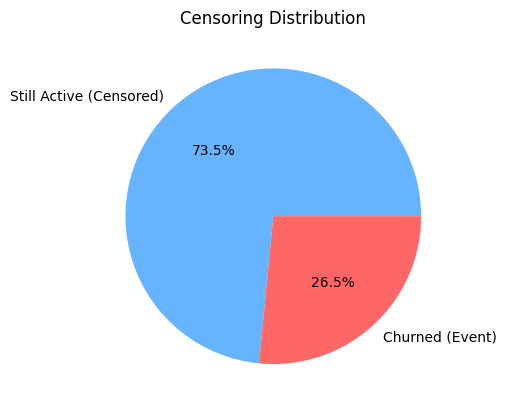

In [36]:
# determining number of censored data
import matplotlib.pyplot as plt

# Add 'event' and 'duration' columns to df_encoded from df
df_encoded['event'] = df['event']
df_encoded['duration'] = df['duration']


event_counts = df_encoded['event'].value_counts()
plt.pie(event_counts, labels=['Still Active (Censored)', 'Churned (Event)'], autopct='%1.1f%%', colors=['#66b3ff','#ff6666'])
plt.title('Censoring Distribution')
plt.show()

- 73.5% of the data is censored meaning that event of churn did not happen for these customers during study

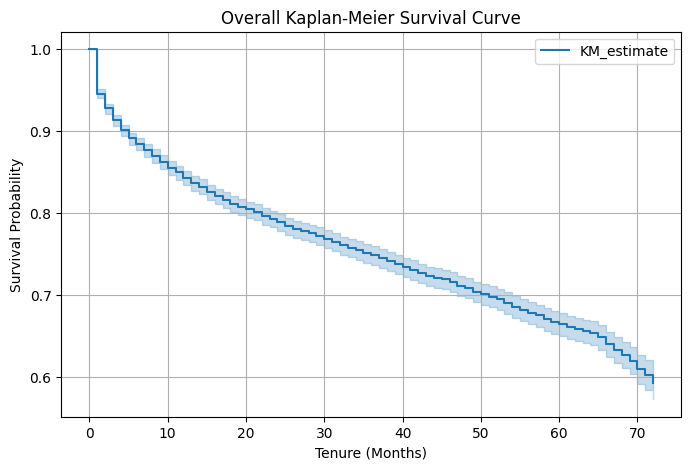

In [37]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()

T = df['duration']
E = df['event']

kmf.fit(T, event_observed=E)

plt.figure(figsize=(8, 5))
kmf.plot_survival_function()
plt.title('Overall Kaplan-Meier Survival Curve')
plt.xlabel('Tenure (Months)')
plt.ylabel('Survival Probability')
plt.grid()
plt.show()


- On average, a customer has around a 60% chance of still being with us after 70 months. Most churn seems to occur earlier — between months 0 and 20 — where the drop is steepest.

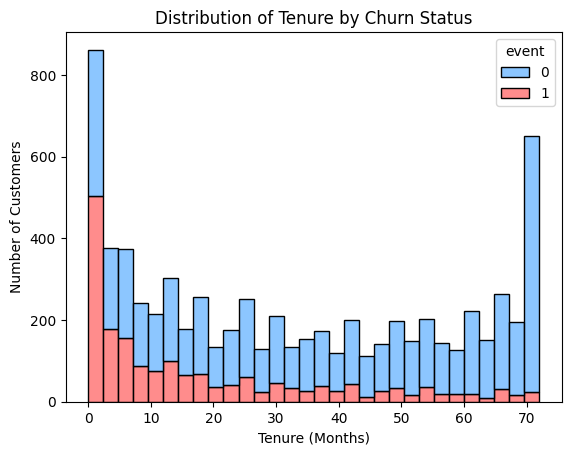

In [38]:
import seaborn as sns

sns.histplot(data=df_encoded, x='duration', hue='event', multiple='stack', bins=30,
             palette=['#66b3ff','#ff6666'])
plt.title('Distribution of Tenure by Churn Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()


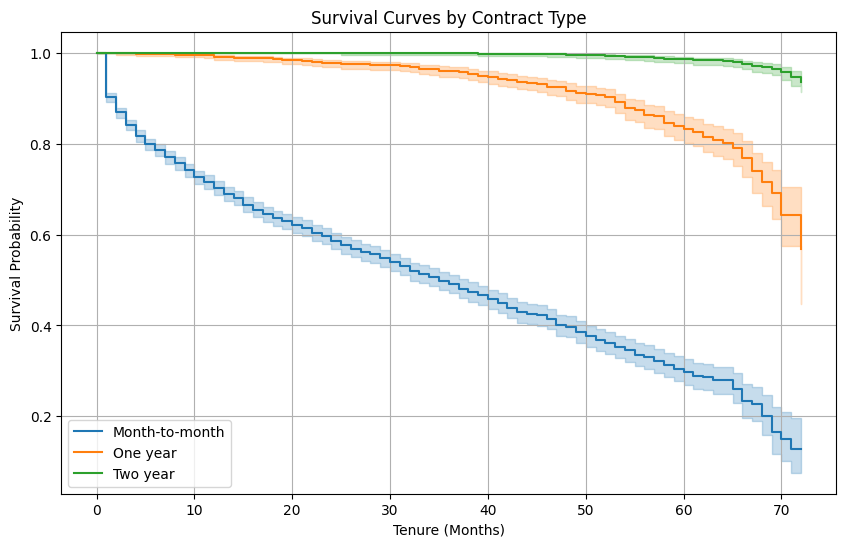

In [39]:
plt.figure(figsize=(10, 6))

for label in df['Contract'].unique():
    kmf.fit(df[df['Contract'] == label]['duration'],
            event_observed=df[df['Contract'] == label]['event'],
            label=label)
    kmf.plot_survival_function()

plt.title('Survival Curves by Contract Type')
plt.xlabel('Tenure (Months)')
plt.ylabel('Survival Probability')
plt.grid()
plt.show()


In [40]:
from lifelines.statistics import pairwise_logrank_test

results = pairwise_logrank_test(df['duration'], df['Contract'], df['event'])
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
                         test_statistic      p  -log2(p)
Month-to-month One year          926.06 <0.005    673.27
               Two year         1550.51 <0.005       inf
One year       Two year          256.22 <0.005    189.15

- The log-rank test produced a p-value < 0.05, so we reject the null hypothesis that the survival curves for all contract types are identical.

 As shown in the Kaplan-Meier curves, customers with a Month-to-month contract exhibit a much steeper decline in survival probability, indicating a higher and faster churn rate compared to those with One year or Two year contracts.

 Customers on Two year contracts have the highest retention, with over 90% still active even after 60 months, highlighting the effectiveness of long-term contracts in reducing churn

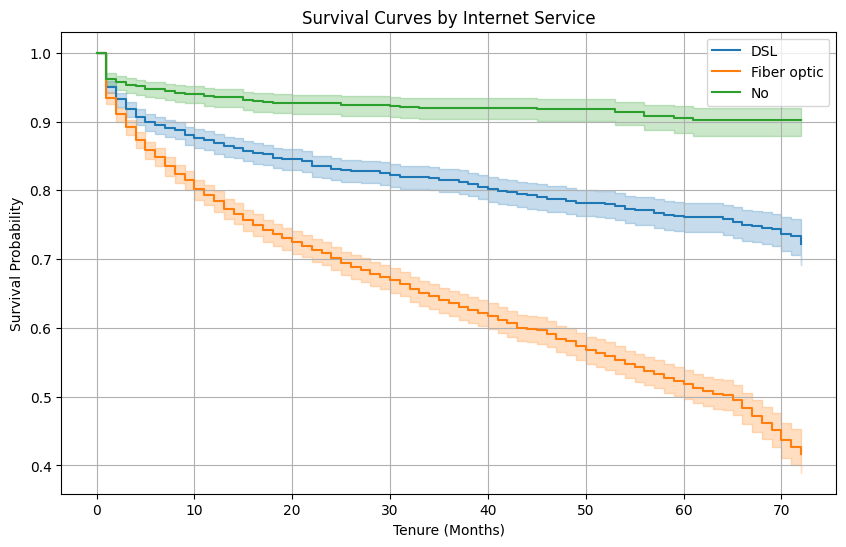

In [41]:
plt.figure(figsize=(10, 6))
for label in df['InternetService'].dropna().unique():
    ix = df['InternetService'] == label
    kmf.fit(df.loc[ix, 'duration'], event_observed=df.loc[ix, 'event'], label=label)
    kmf.plot_survival_function()

plt.title('Survival Curves by Internet Service')
plt.xlabel('Tenure (Months)')
plt.ylabel('Survival Probability')
plt.grid()
plt.show()


In [42]:
from lifelines.statistics import pairwise_logrank_test

results = pairwise_logrank_test(df['duration'], df['InternetService'], df['event'])
results.print_summary()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
                         test_statistic      p  -log2(p)
DSL         Fiber optic          227.17 <0.005    168.12
            No                    80.32 <0.005     61.44
Fiber optic No                   374.16 <0.005    274.50

- The log-rank test produced a p-value < 0.05, so we reject the null hypothesis that the survival curves for all internet service types are identical.

 As shown in the Kaplan-Meier curves, customers with a fiber optic internet service exhibit a much steeper decline in survival probability, indicating a higher and faster churn rate compared to others.

 Customers with no internet service  have the highest retention, with over 90% still active even after 70 months .

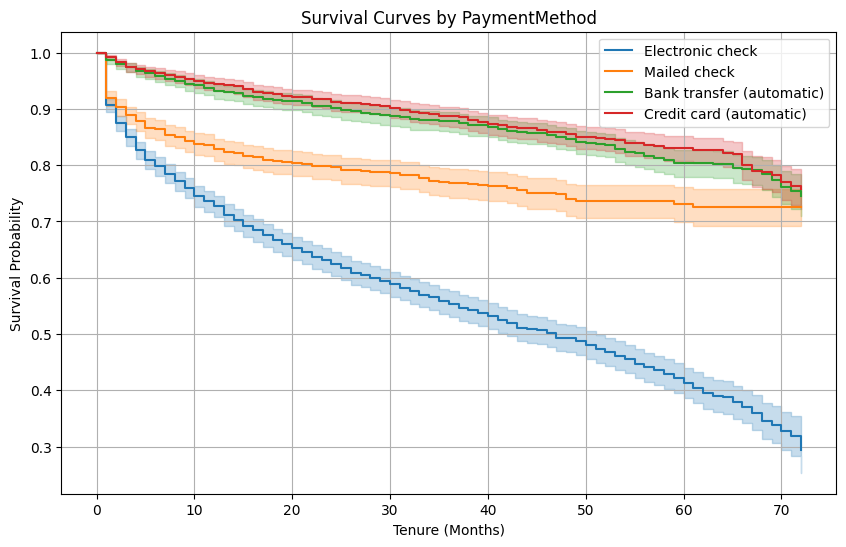

In [43]:
plt.figure(figsize=(10, 6))
for label in df['PaymentMethod'].dropna().unique():
    ix = df['PaymentMethod'] == label
    kmf.fit(df.loc[ix, 'duration'], event_observed=df.loc[ix, 'event'], label=label)
    kmf.plot_survival_function()

plt.title('Survival Curves by PaymentMethod')
plt.xlabel('Tenure (Months)')
plt.ylabel('Survival Probability')
plt.grid()
plt.show()


In [44]:
from lifelines.statistics import pairwise_logrank_test

results = pairwise_logrank_test(df['duration'], df['PaymentMethod'], df['event'])
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
                                                   test_statistic      p  -log2(p)
Bank transfer (automatic) Credit card (automatic)            0.87   0.35      1.51
                          Electronic check                 510.04 <0.005    372.74
                          Mailed check                      51.07 <0.005     40.03
Credit card (automatic)   Electronic check                 539.74 <0.005    394.21
                          Mailed check                      64.82 <0.005     50.11
Electronic check          Mailed check                     152.46 <0.005    113.93

- both bank transfer and credit card have the same curve since p value is higher than 0.05 so we fail to reject H0 whereas all the other payment methods have a p values lower than 0.05 .

 As shown in the Kaplan-Meier curves , customers who use electronic check as a payment method exhibit a much steeper decline in survival probability.

   Customers with bank transfer and credit card payment methods have the highest retention, with over 70% still active even after 70 months .

# **4.Models**

# Classification model

In [45]:
# Define features and target
# 🔁 STEP 1: Make sure customerID is excluded from the final features
final_features = [f for f in final_features if f != "customerID"]

# ✅ STEP 2: Define features and target
X = df_encoded[final_features]
y = df_encoded['Churn'].map({0: 0, 1: 1})  # Ensure binary format

# 📌 (Optional) Save customerID for future use (e.g. for matching in frontend)
customer_ids = df_encoded["customerID"]

# 🔀 STEP 3: Train-test split with stratification
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)


# Check class balance in train and test
print("Train class distribution:\n", y_train.value_counts(normalize=True))
print("Test class distribution:\n", y_test.value_counts(normalize=True))

Train class distribution:
 Churn
0    0.734686
1    0.265314
Name: proportion, dtype: float64
Test class distribution:
 Churn
0    0.734501
1    0.265499
Name: proportion, dtype: float64


# training baseline model on unbalanced data


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.65      0.54      0.59       561

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

ROC AUC Score: 0.8418003565062389


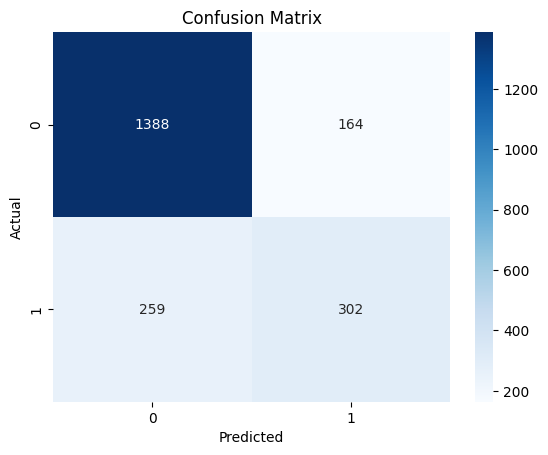

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Initialize Logistic Regression (use solver='liblinear' for small datasets)
model = LogisticRegression(random_state=42, solver='liblinear')

# Train on training data
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # probability estimates for positive class

# Evaluate
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Optional: confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [47]:
!pip install imblearn


In [48]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd
import numpy as np


In [49]:
# Assume you have X_train, y_train, X_test, y_test already defined

# SMOTE for tree-based models
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [50]:
# Models with class_weight for linear/kernel models
models_class_weight = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42),
    "SVM": SVC(probability=True, class_weight='balanced', random_state=42)
}

# Tree-based models (train on SMOTE data)
models_smote = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}


In [51]:
def train_evaluate(models, X_tr, y_tr, X_te, y_te):
    results = {}
    for name, model in models.items():
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_te)
        y_proba = model.predict_proba(X_te)[:, 1]

        report = classification_report(y_te, y_pred, output_dict=True)
        auc = roc_auc_score(y_te, y_proba)

        results[name] = {
            'Precision (churn)': report['1']['precision'],
            'Recall (churn)': report['1']['recall'],
            'F1-score (churn)': report['1']['f1-score'],
            'Accuracy': report['accuracy'],
            'ROC AUC': auc
        }
    return pd.DataFrame(results).T


In [52]:
# Train/eval class_weight models on original data
results_class_weight = train_evaluate(models_class_weight, X_train, y_train, X_test, y_test)

# Train/eval SMOTE models on SMOTE data
results_smote = train_evaluate(models_smote, X_train_smote, y_train_smote, X_test, y_test)

# Combine results
results_all = pd.concat([results_class_weight, results_smote])
results_all = results_all.round(3).sort_values('F1-score (churn)', ascending=False)
print(display(results_all.round(3)))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:18:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Precision (churn)  Recall (churn)  F1-score (churn)  \
Logistic Regression              0.510           0.791             0.620   
SVM                              0.484           0.779             0.597   
Random Forest                    0.573           0.592             0.582   
XGBoost                          0.542           0.594             0.567   
Decision Tree                    0.475           0.535             0.503   

                     Accuracy  ROC AUC  
Logistic Regression     0.743    0.841  
SVM                     0.721    0.817  
Random Forest           0.775    0.810  
XGBoost                 0.759    0.798  
Decision Tree           0.719    0.662

None


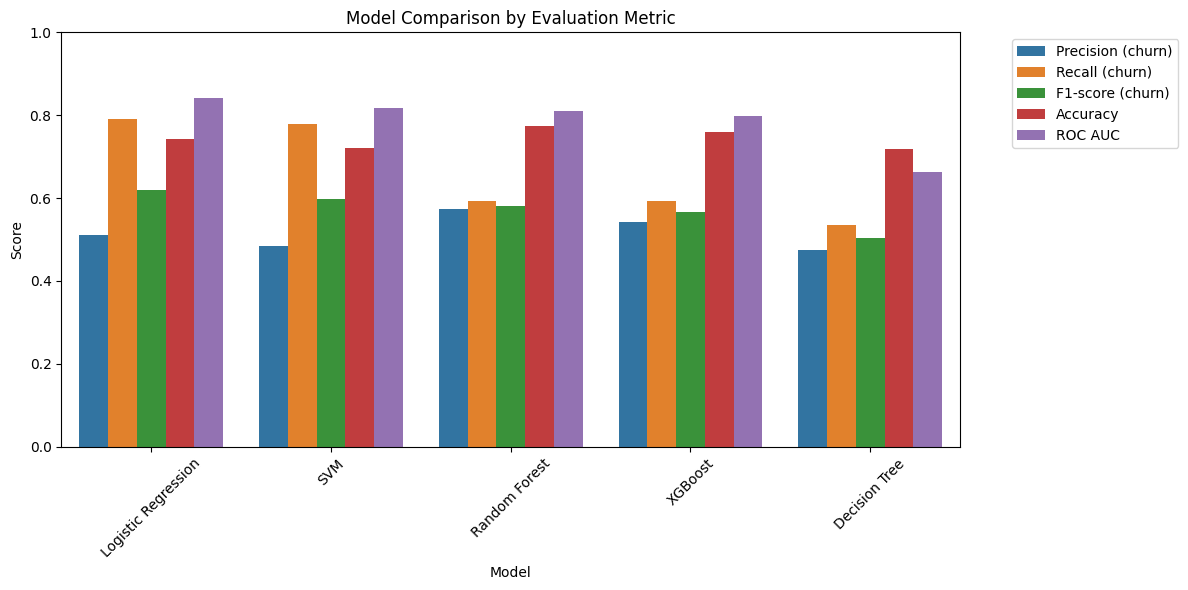

In [53]:
# Reshape for plotting
results_melted = results_all.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
results_melted.rename(columns={'index': 'Model'}, inplace=True)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric')
plt.title('Model Comparison by Evaluation Metric')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:19:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


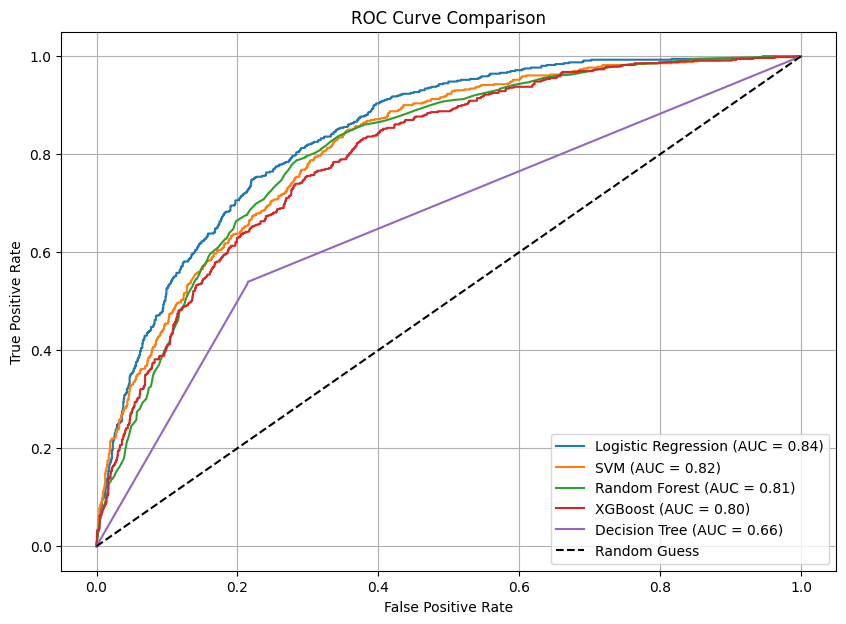

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 7))

for name, model in {**models_class_weight, **models_smote}.items():
    # Select right training data
    if name in models_class_weight:
        model.fit(X_train, y_train)
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        model.fit(X_train_smote, y_train_smote)
        y_proba = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define hyperparameter space
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # regularization strength
    'solver': ['liblinear'],       # good for small datasets and L2 penalty
    'penalty': ['l2']
}

# Set up logistic regression with class weight
lr = LogisticRegression(class_weight='balanced', max_iter=1000)

# Grid search with 5-fold CV, optimizing F1 score
grid = GridSearchCV(estimator=lr, param_grid=param_grid,
                    scoring='f1', cv=5, n_jobs=-1, verbose=1)

# Fit to training data
grid.fit(X_train, y_train)

# Best model and parameters
print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.72      0.80      1552
           1       0.51      0.79      0.62       561

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.74      0.76      2113

ROC AUC Score: 0.8413799915467592


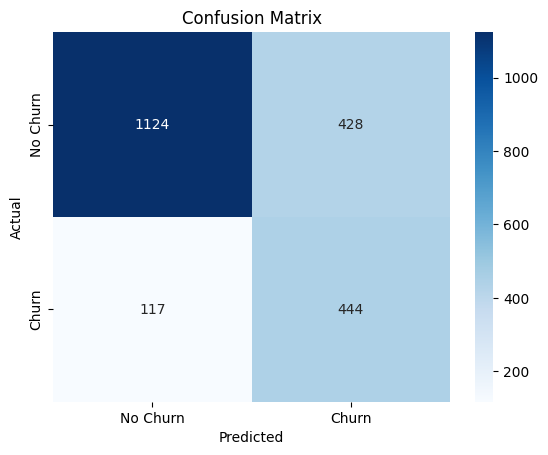

In [56]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Predict on test set
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

# Optional: confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


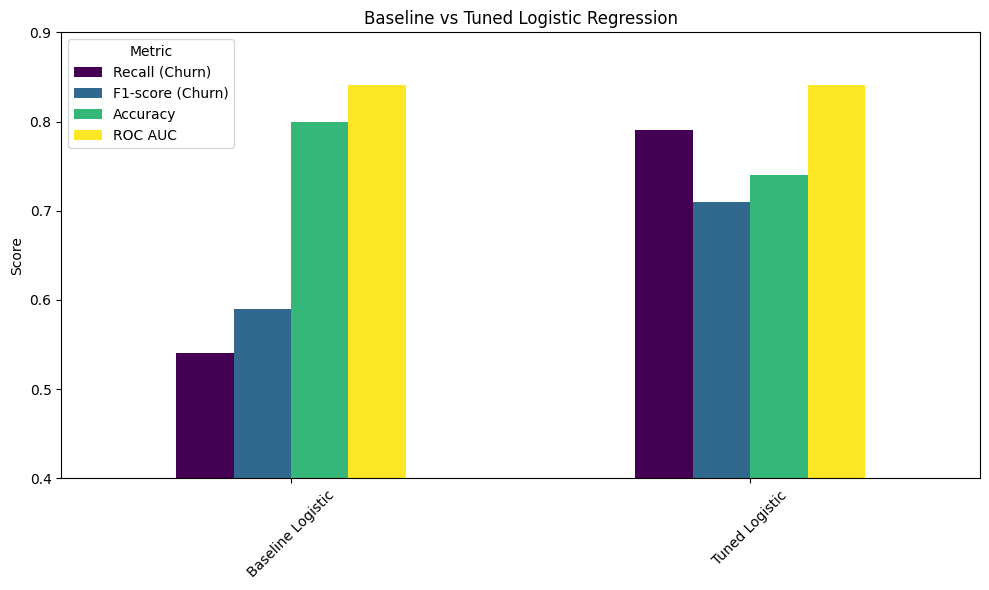

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
comparison_df = pd.DataFrame({
    'Metric': ['Recall (Churn)', 'F1-score (Churn)', 'Accuracy', 'ROC AUC'],
    'Baseline Logistic': [0.54, 0.59, 0.8, 0.841],
    'Tuned Logistic': [0.79, 0.71, 0.74, 0.841]
})

comparison_df


comparison_df.set_index('Metric').T.plot(kind='bar', colormap='viridis', figsize=(10, 6))
plt.title("Baseline vs Tuned Logistic Regression")
plt.ylabel("Score")
plt.ylim(0.4, 0.9)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [58]:
import joblib

# Save the best model for deployment/dashboard
joblib.dump(best_model, 'churn_model.pkl')


['churn_model.pkl']

In [59]:
X_test = X_test.copy()  # to avoid SettingWithCopyWarning
X_test['churn_proba'] = y_prob
X_test['churn_pred'] = y_pred


In [60]:
X_test[['churn_proba', 'churn_pred']].head(100)


churn_proba  churn_pred
4994     0.839671           1
6828     0.076467           0
755      0.895419           1
404      0.103312           0
981      0.033213           0
...           ...         ...
1883     0.532999           1
123      0.391876           0
964      0.686709           1
126      0.795370           1
5718     0.834187           1

[100 rows x 2 columns]

# Survival model

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lifelines import CoxPHFitter
df_encoded['duration'] = df_encoded['tenure']
df_encoded['event'] = df_encoded['Churn']
# Drop columns that cause leakage or aren't predictors
# 'churn' must NOT be in the feature set; keep only as event_col

df_surv = df_encoded.drop(columns=['customerID', 'tenure', 'Churn'], errors='ignore')

# Scale numeric features
numeric_cols = ['MonthlyCharges', 'TotalCharges']  # adjust if needed
scaler = StandardScaler()
df_surv[numeric_cols] = scaler.fit_transform(df_surv[numeric_cols])


# Split into train and test sets
df_train, df_test = train_test_split(df_surv, test_size=0.2, random_state=42)
# Bin TotalCharges in df_train and capture bins
df_train['TotalCharges_binned'] = pd.qcut(
    df_train['TotalCharges'], q=4, duplicates='drop'
)

# Extract the bin edges (they will now be strictly increasing)
totalcharges_bins = df_train['TotalCharges_binned'].cat.categories

# Fit Cox model
cph = CoxPHFitter()
cph.fit(df_train, duration_col='duration', event_col='event',
        strata=['TotalCharges_binned', 'SeniorCitizen_1', 'InternetService_No',
                'Contract_One year', 'Contract_Two year'])

# Print summary and interpret coefficients
cph.print_summary()



/usr/local/lib/python3.11/dist-packages/lifelines/fitters/__init__.py:1280: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for stratum, df_ in df.groupby(strata):
/usr/local/lib/python3.11/dist-packages/lifelines/fitters/coxph_fitter.py:1868: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for stratum, stratified_X in X.groupby(self.strata):
/usr/local/lib/python3.11/dist-packages/lifelines/fitters/coxph_fitter.py:1868: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the 

<lifelines.CoxPHFitter: fitted with 5634 total observations, 4138 right-censored observations>
             duration col = 'duration'
                event col = 'event'
                   strata = ['TotalCharges_binned', 'SeniorCitizen_1', 'InternetService_No', 'Contract_One year', 'Contract_Two year']
      baseline estimation = breslow
   number of observations = 5634
number of events observed = 1496
   partial log-likelihood = -6991.68
         time fit was run = 2025-08-07 17:19:10 UTC

---
                                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                              
Partner                               -0.04      0.96      0.06           -0.17            0.08                0.85                1.09
Dependents                            -0.21      0.81      0.08           -0.37           -0.06                0.69                0.94
PhoneService                           1.85      6.33      0.54            0.80            2.89                2.22               18.06
MultipleLines                          0.41      1.50      0.14            0.13            0.68                1.14                1.98
OnlineSecurity                         0.02      1.02      0.15           -0.28            0.32                0.75                1.37
OnlineBackup                           0.17      1.18      0.14           -0.11            0.45                0.89                1.57
DeviceProtection                       0.43      1.53      0.14            0.14            0.71                1.15                2.03
TechSupport                            0.11      1.11      0.15           -0.18            0.40                0.83                1.49
StreamingTV                            0.88      2.42      0.27            0.36            1.41                1.43                4.08
StreamingMovies                        1.00      2.71      0.27            0.48            1.52                1.61                4.57
PaperlessBilling                       0.24      1.27      0.06            0.12            0.37                1.13                1.44
MonthlyCharges                        -0.92      0.40      0.78           -2.44            0.61                0.09                1.83
TotalCharges                          -4.64      0.01      0.18           -4.99           -4.30                0.01                0.01
gender_Male                           -0.03      0.97      0.05           -0.13            0.08                0.88                1.08
InternetService_Fiber optic            2.51     12.32      0.65            1.23            3.79                3.43               44.23
PaymentMethod_Credit card (automatic) -0.01      0.99      0.10           -0.21            0.19                0.81                1.21
PaymentMethod_Electronic check         0.32      1.38      0.08            0.16            0.48                1.18                1.62
PaymentMethod_Mailed check             0.31      1.36      0.10            0.11            0.50                1.12                1.66

                                       cmp to      z      p  -log2(p)
covariate                                                            
Partner                                  0.00  -0.66   0.51      0.97
Dependents                               0.00  -2.71   0.01      7.22
PhoneService                             0.00   3.45 <0.005     10.80
MultipleLines                            0.00   2.87 <0.005      7.94
OnlineSecurity                           0.00   0.10   0.92      0.13
OnlineBackup                             0.00   1.18   0.24      2.07
DeviceProtection                         0.00   2.95 <0.005      8.30
TechSupport                              0.00   0.72   0.47      1.09
StreamingTV                              0.00   3.31 <0.005     10.06
Streamin

/usr/local/lib/python3.11/dist-packages/lifelines/fitters/coxph_fitter.py:1868: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for stratum, stratified_X in X.groupby(self.strata):



   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
ass

<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 5634 total observations, 4138 right-censored observations>
         test_name = proportional_hazard_test

---
                                            test_statistic      p  -log2(p)
Dependents                            km              0.74   0.39      1.36
                                      rank            0.28   0.59      0.75
DeviceProtection                      km              0.03   0.86      0.21
                                      rank            0.02   0.89      0.17
InternetService_Fiber optic           km              0.64   0.42      1.24
                                      rank            0.21   0.65      0.62
MonthlyCharges                        km              0.88   0.35      1.52
                                      rank            2.80   0.09      3.41
MultipleLines                         km              0.49   0.48      1.05
                                      rank            0.05   0.83      0.28
OnlineBackup                          km              0.14   0.71      0.49
                                      rank            0.07   0.79      0.34
OnlineSecurity                        km              1.70   0.19      2.38
                                      rank            2.03   0.15      2.69
PaperlessBilling                      km              0.14   0.71      0.50
                                      rank            0.47   0.49      1.02
Partner                               km              0.38   0.54      0.90
                                      rank            0.14   0.70      0.51
PaymentMethod_Credit card (automatic) km              1.46   0.23      2.14
                                      rank            2.63   0.11      3.25
PaymentMethod_Electronic check        km              0.99   0.32      1.65
                                      rank            1.94   0.16      2.61
PaymentMethod_Mailed check            km              0.04   0.85      0.24
                                      rank            0.51   0.48      1.07
PhoneService                          km              0.13   0.72      0.48
                                      rank            0.00   0.97      0.04
StreamingMovies                       km              0.17   0.68      0.56
                                      rank            0.00   0.95      0.07
StreamingTV                           km              0.44   0.51      0.97
                                      rank            0.11   0.73      0.44
TechSupport                           km              1.24   0.27      1.91
                                      rank            0.76   0.38      1.39
TotalCharges                          km             75.59 <0.005     57.99
                                      rank            0.25   0.62      0.70
gender_Male                           km              0.11   0.74      0.43
                                      rank            0.60   0.44      1.19



1. Variable 'TotalCharges' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'TotalCharges' might be incorrect. That is, there
may be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'TotalCharges' using pd.cut, and then specify it in
`strata=['TotalCharges', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebook

[[<Axes: xlabel='rank-transformed time\n(p=0.7036)'>,
  <Axes: xlabel='km-transformed time\n(p=0.5376)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.5938)'>,
  <Axes: xlabel='km-transformed time\n(p=0.3886)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.9724)'>,
  <Axes: xlabel='km-transformed time\n(p=0.7154)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.8260)'>,
  <Axes: xlabel='km-transformed time\n(p=0.4822)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.1547)'>,
  <Axes: xlabel='km-transformed time\n(p=0.1917)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.7892)'>,
  <Axes: xlabel='km-transformed time\n(p=0.7131)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.8871)'>,
  <Axes: xlabel='km-transformed time\n(p=0.8622)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.3820)'>,
  <Axes: xlabel='km-transformed time\n(p=0.2658)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.7350)'>,
  <Axes: xlabel='km-transformed time\n(p=0.5088)'>],
 [<Axes: xlabel='rank-transformed tim

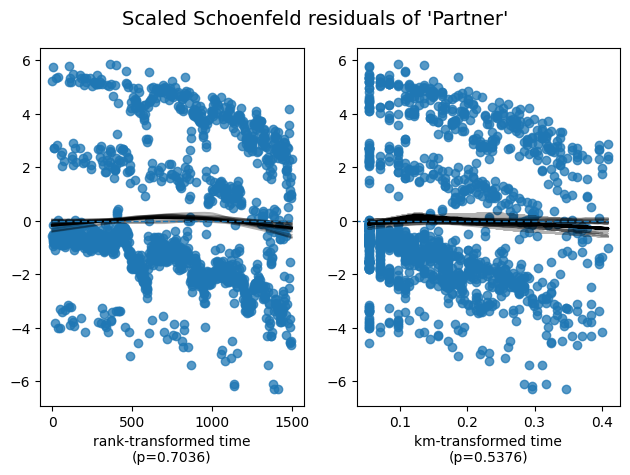

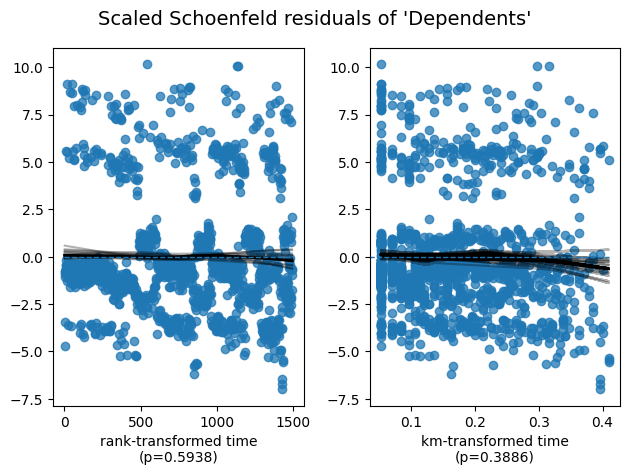

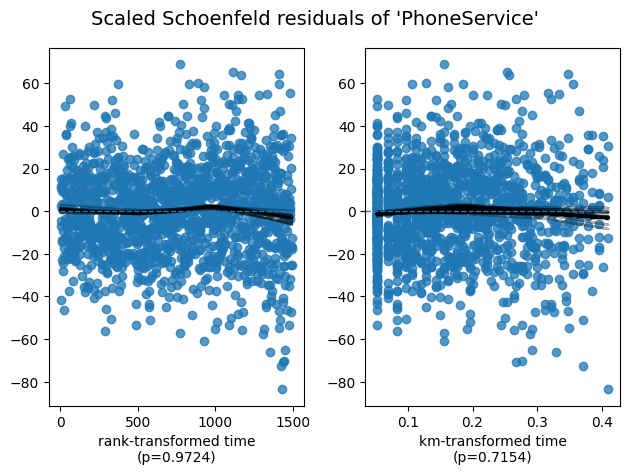

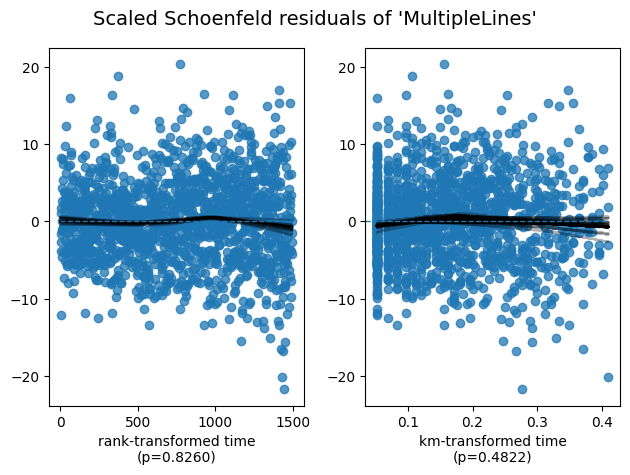

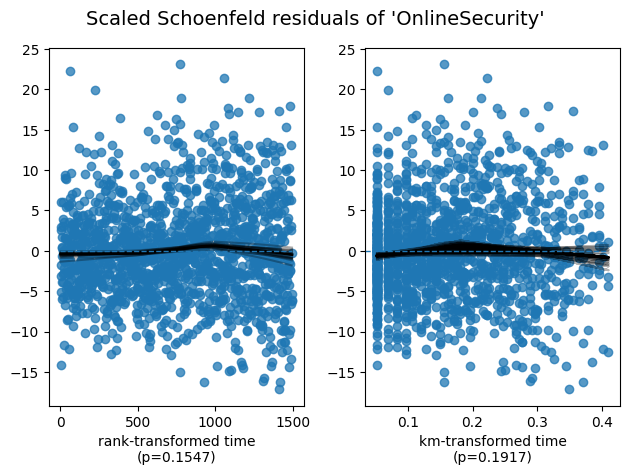

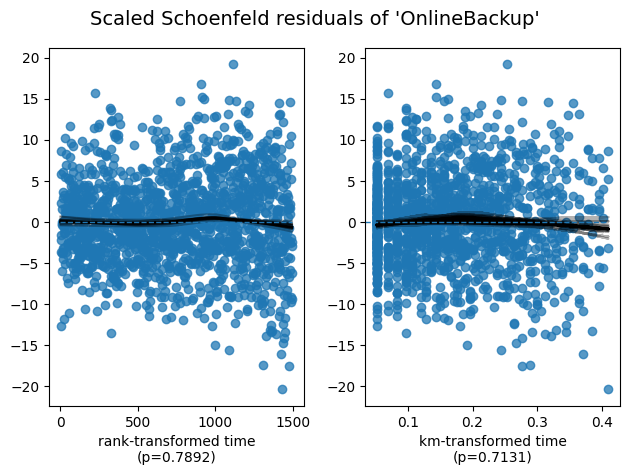

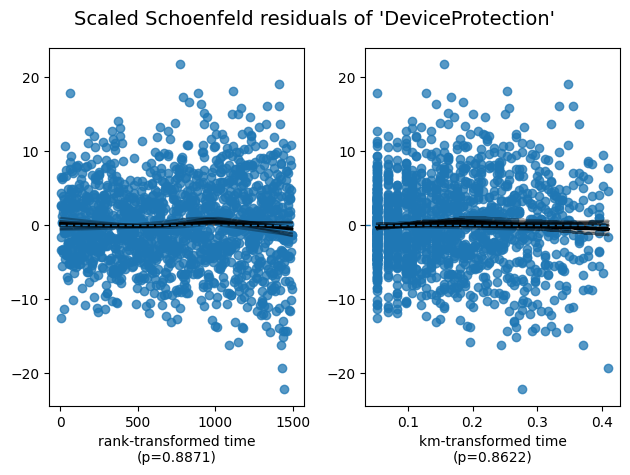

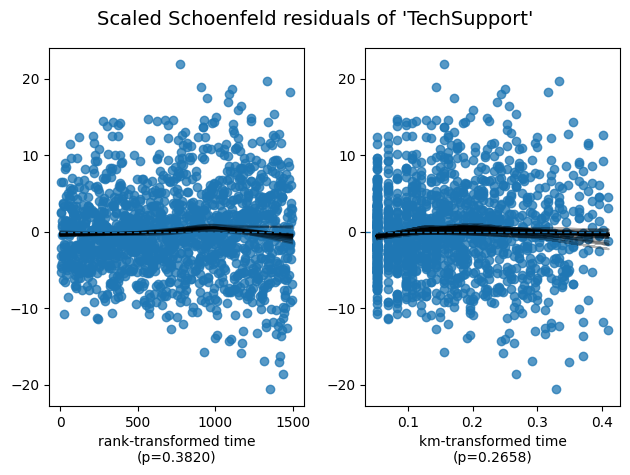

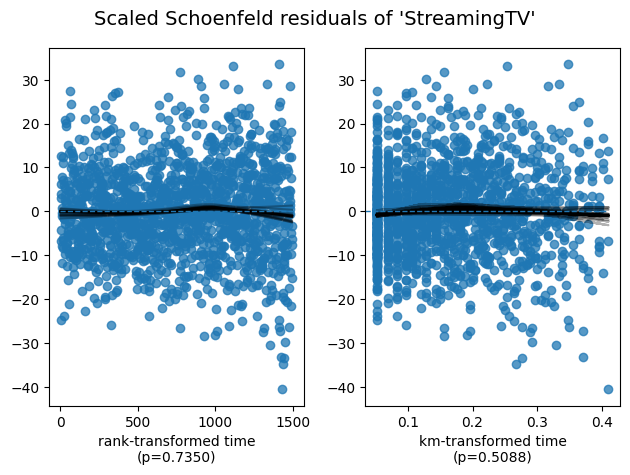

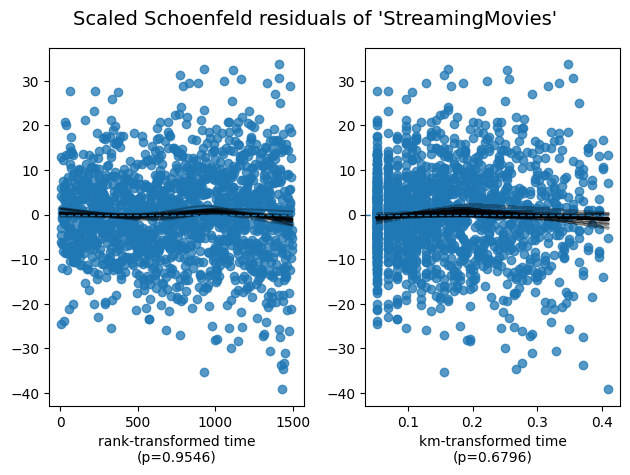

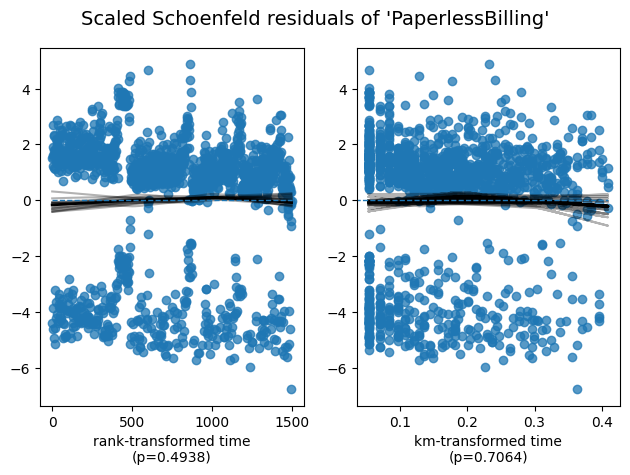

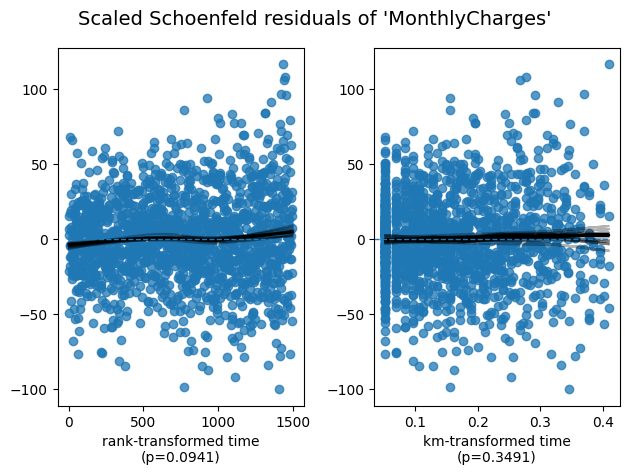

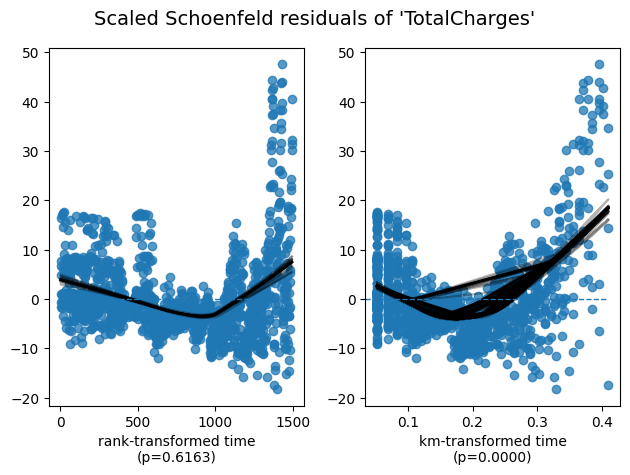

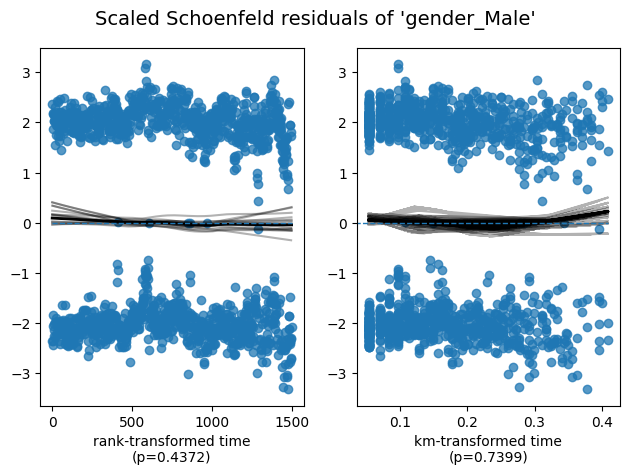

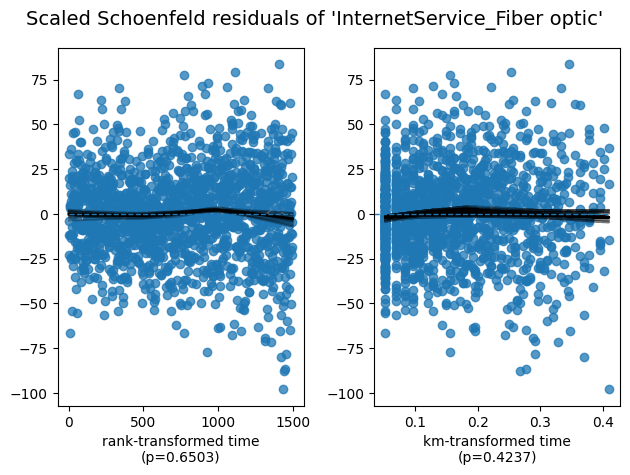

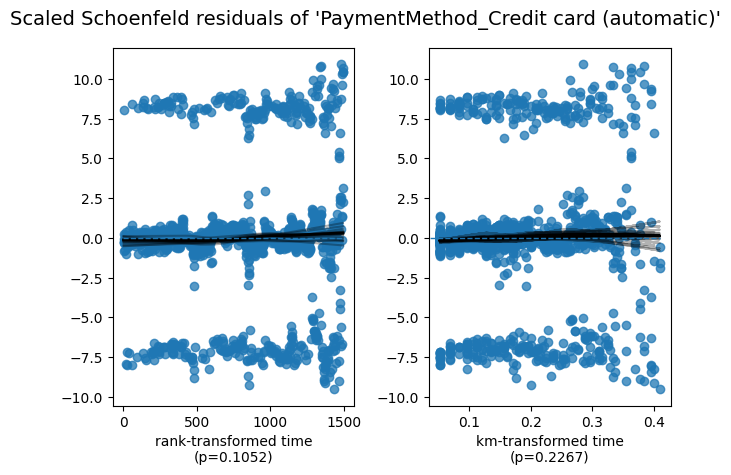

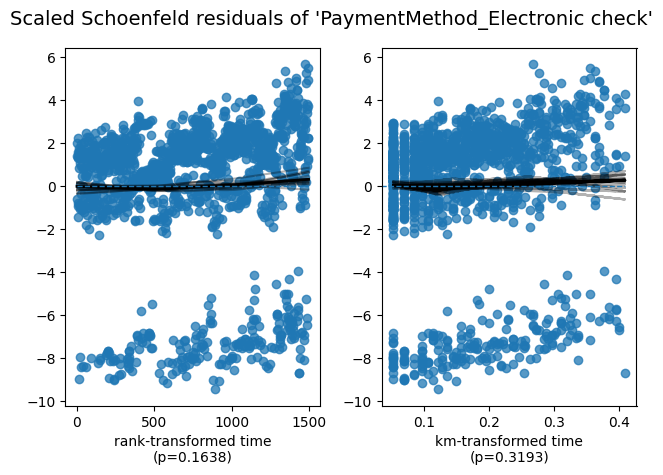

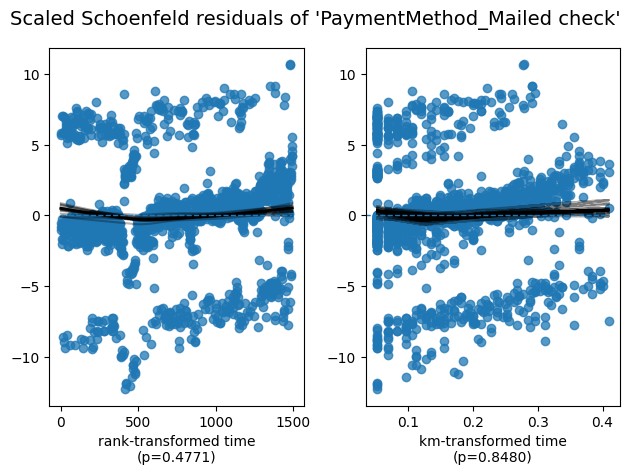

In [62]:
cph.check_assumptions(df_train, p_value_threshold=0.05, show_plots=True)


In [63]:
df_test['TotalCharges_binned'] = pd.cut(
    df_test['TotalCharges'], bins=totalcharges_bins
)



In [64]:
# Evaluate model on test set
test_cindex = cph.score(df_test, scoring_method='concordance_index')
print(f"Corrected Test C-index: {test_cindex:.3f}")


Corrected Test C-index: 0.897


/usr/local/lib/python3.11/dist-packages/lifelines/utils/__init__.py:933: UserWarning: DataFrame Index is not unique, defaulting to incrementing index instead.
  warnings.warn("DataFrame Index is not unique, defaulting to incrementing index instead.")


/usr/local/lib/python3.11/dist-packages/lifelines/fitters/coxph_fitter.py:2339: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for stratum, stratified_X in X.groupby(self.strata):


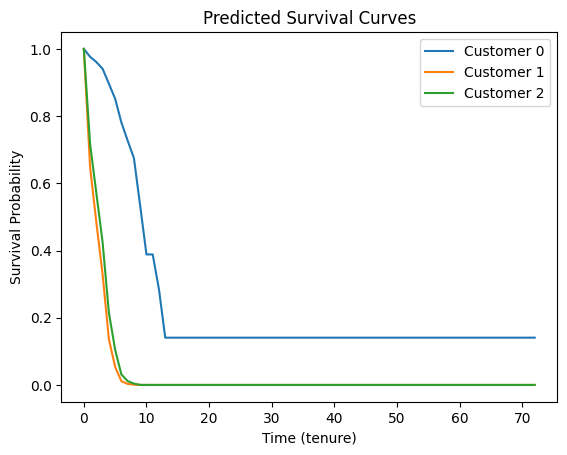

In [65]:
surv_funcs = cph.predict_survival_function(df_test)

# Plot for first 3 customers
import matplotlib.pyplot as plt
for i in range(3):
    surv_funcs.iloc[:, i].plot(label=f'Customer {i}')
plt.xlabel("Time (tenure)")
plt.ylabel("Survival Probability")
plt.title("Predicted Survival Curves")
plt.legend()
plt.show()


In [66]:
# Risk scores: higher = higher chance of early churn
risk_scores = cph.predict_partial_hazard(df_test)
print(risk_scores.head())


185       9.415187
2715      8.866524
3825      5.586877
1807    171.711618
132       0.023120
dtype: float64
